# Referencias:

Fontes principais:
- <a id='dePrado'><span style='color:red'>dePrado</span></a>: *Advances in Financial Machine Learning*
- <a id='AFTS'><span style='color:red'>AFTS</span></a>: *Analysis of Financial Time Series*

Livros:
- <a id='intro_book'><span style='color:red'>intro_book</span></a>: An Introductory Study on Time-Series Modeling and Forecast
- <a id='forecasting'><span style='color:red'>forecasting<span></a>: Forecasting: Methods and Applications (HYNDMAN, Rob)

Artigos:
- <a id='hetero'><span style='color:red'>hetero</span></a>: Conditional heteroskedasticity in crypto-assets return
- <a id='ref_2'><span style='color:red'>ref_2</span></a>: Machine Learning Strategies for Time Series Forecasting
- <a id='ref_3'><span style='color:red'>ref_3</span></a>: Financial Series Prediction - Comparison Between Precision of Time Series Models and Machine Learning Methods
- <a id='ref_4'><span style='color:red'>ref_4</span></a>: The 10 reasons most machine learning funds fail
- <a id='ref_6'><span style='color:red'>ref_6</span></a>: Application of machine learning techniques for stock market prediction
- <a id='ref_7'><span style='color:red'>ref_7</span></a>: Time Series Data Prediction and Analysis
- <a id='ref_8'><span style='color:red'>ref_8</span></a>: Text Mining for Market Prediction - A Systematic Review

Links:
- <a id='xenon'><span style='color:red'>xenon</span></a>: https://www.xenonstack.com/blog/data-science/time-series-analysis-forecasting-using-machine-learning-deep-learning
- <a id='towards'><span style='color:red'>towards</span></a>: https://towardsdatascience.com/time-series-analysis-in-python-an-introduction-70d5a5b1d52a
- <a id='vidhya'><span style='color:red'>vidhya</span></a>: https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
- <a id='vidhya2'><span style='color:red'>vidhya2</span></a>: https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/
- <a id='duke'><span style='color:red'>duke</span></a>: http://people.duke.edu/~rnau/411home.htm
- <a id='auquan'><span style='color:red'>auquan</span></a>: https://medium.com/auquan/tagged/mathematics
- <a id='quantinsti'><span style='color:red'>quantinsti</span></a>: https://www.quantinsti.com/blog/forecasting-stock-returns-using-arima-model/
- <a id='ethz'><span style='color:red'>ethz</span></a>: http://stat.ethz.ch/~nicolai/timeseries/week2.pdf
- <a id='hyndman'><span style='color:red'>hyndman</span></a>: https://robjhyndman.com/talks/RevolutionR/8-Differencing.pdf - **bom resumo pra passar pro povo**
- <a id='statsmodel'><span style='color:red'>statsmodel</span></a>: https://www.statsmodels.org/stable/index.html
- <a id='stationarity'><span style='color:red'>stationarity</span></a>: https://stats.stackexchange.com/questions/19715/why-does-a-time-series-have-to-be-stationary & https://stats.stackexchange.com/questions/55477/stationarity-requirement-why
- <a id='arch'><span style='color:red'>arch</span></a>: http://arch.readthedocs.io/en/latest/univariate/introduction.html
- <a id='samir'><span style='color:red'>samir</span></a>: https://ufsj.edu.br/portal2-repositorio/File/martins/cap12_samir.pdf
- <a id='harvard'><span style='color:red'>harvard</span></a>: http://iacs-courses.seas.harvard.edu/courses/am207/blog/lecture-17.html - Harvard Lectures in Python
- <a id='quantstart'><span style='color:red'>quantstart</span></a>: https://www.quantstart.com/articles/Generalised-Autoregressive-Conditional-Heteroskedasticity-GARCH-p-q-Models-for-Time-Series-Analysis
- <a id='arch_effects'><span style='color:red'>arch_effects</span></a>: https://stats.stackexchange.com/questions/77925/procedure-for-fitting-an-arma-garch-model

# Teoria

## 0. Stationarity
- **Strictly stationary series**:
    - Joint distribution of $(r_{t1}, ..., r_{tk})$ is invariant under time shift.
- **Weakly stationary series**:
    - Constant mean, i.e., $E[r_t] = \mu$
    - Covariance between $r_t$ and $r_{t-l}$ are time-invariant, i.e., $cov(r_t, r_{t-l})=\gamma_l$, which only depends on $l$
- *In applications, weak stationarity enables one to make inferences concerning future observations (e.g., prediction).*

## 1. Covariance
- $ cov(X,Y) = E[(X - E(X))(Y - E(Y))] = E[XY] - E[X]E[Y] $
    
## 2. Correlation
- **Pearson correlation coefficient**
    - https://en.wikipedia.org/wiki/Pearson_correlation_coefficient
    - Formula:

        \begin{equation*}
            \rho_{X,Y} = \frac{cov(X,Y)}{\sigma_X \sigma_Y} \equiv \frac{cov(X,Y)}{\sqrt{var(X)var(Y)}}
        \end{equation*}
        <br>
        - For a sample: 

            \begin{equation} 
                \hat{\rho}_{X,Y} = \frac{\sum_{t=1}^{T} (x_t - \overline{x})(y_t - \overline{y})}
                    {\sqrt{\sum_{t=1}^{T}(x_t - \overline{x})^2\sum_{t=1}^{T}(y_t - \overline{y})^2}}
            \end{equation}
                
## 3. Lag-$l$ autocovariance of $r_t$

- Para lembrar: $\gamma$ tem um formato parecido com 'v', de autoco**v**ariancia.

\begin{equation}
    \gamma_l = cov(r_t, r_{t-l})
\end{equation}

- For a sample:
\begin{equation}
   \hat{\gamma_l} = \frac{1}{T-l-1} \sum_{t=l+1}^T (r_t - \overline{r})(r_{t-l} - \overline{r_l})
\end{equation}
    - under the stationarity assumption:
    \begin{equation}
       \hat{\gamma_l} = \frac{1}{T-l-1} \sum_{t=l+1}^T (r_t - \overline{r})(r_{t-l} - \overline{r})
    \end{equation}
- Properties: 
    1. $ \gamma_0 = Var(r_t) $  
    2. $\gamma_{-l}=\gamma_l $
        
## 4. Lag-$l$ autocorrelation of $r_t$

- Para lembrar: $\rho$ de autoco$\rho$elacao.

\begin{equation}
    \rho_l = \frac{cov(r_t,r_{t-l})}{\sqrt{var(r_t)var(r_{t-l})}}
\end{equation}
- which, under the stationary assumption, becomes
\begin{equation}
    \rho_l = \frac{cov(r_t,r_{t-l})}{var(r_t)} = \frac{\gamma_l}{\gamma_0}
\end{equation}

## 5. Lag-$l$ *sample* autocorrelation of $r_t$ $\equiv$ sample autocorrelation function (ACF)

\begin{equation}
    \hat{\rho_l} = \frac{\sum_{t=l+1}^T (r_t - \overline{r})(r_{t-l} - \overline{r})}{\sum_{t=1}^T (r_t - \overline{r})^2}, \quad 0 < l < T - 1
\end{equation}
<br>
-  a linear time series model can be characterized by its ACF, and linear time series modeling makes use of the sample ACF to capture the linear dynamic of the data.

## 7. Partial autocorrelation function (PACF)

- *Function of its ACF and is a useful tool for determining the order p of an AR model*.
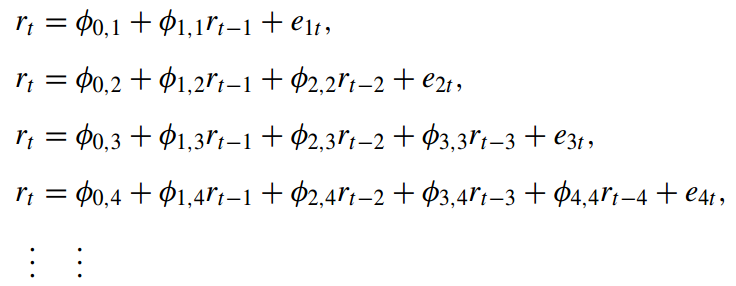
- The estimate $\hat{\phi}_{1,1}$ of the first equation is called the **lag-1 sample PACF** of rt. The estimate $\hat{\phi}_{2,2}$ of the second equation is the **lag-2 sample PACF** of rt. The estimate $\hat{\phi}_{3,3}$ of the third equation is the **lag-3 sample PACF** of $r_t$, and so on.
- The lag-2 PACF $\hat{\phi}_{2,2}$ shows the added contribution of $r_{t-2}$ to $r_t$ over the AR(1) model $r_t = \phi_0 + \phi_1 r_{t-1} + e_{1t}$. The lag-3 PACF shows the added contribution of $r_{t-3}$ to $r_t$ over an AR(2) model, and so on. Therefore, **for an AR(p) model, the lag-p sample PACF should not be zero, but $\hat{\phi}_{j,j}$ should be close to zero for all j > p**. We make use of this property to determine the order p.

## Predicao

1. Predicao ingenua: multistep - vai para a media
- **Simulacao atualizada um passo a frente**: Atualiza o modelo a cada iteracao e preve um passo a frente (overfitting(?) alto)
- **Simulacao um passo a frente**: Utiliza os parametros treinados ate $t$ para prever $t+1$, $t+2$, etc, iterativamente, utilizando os *valores reais* como entrada. (overfitting(?) medio)
- **Simulacao livre**: Utiliza os parametros treinados ate $t$ para prever $t+1$, $t+2$, etc, iterativamente, utilizando as *predicoes* como entrada (uma predicao em cima da outra). (overfitting(?) baixo)
- **Simulacao livre "purged"**: Utiliza os parametros treinados ate $t$ para prever dados em $t+h, t+h+1, t+h+2$, estilo **purged k-fold CV** (overfitting(?) baixo/nulo)

Fonte: [samir](#samir)

# PART I. Modelos lineares

## 1. AR(p) models

\begin{equation}
    r_t = \phi_0 + \phi_1 r_{t-1} + \phi_2 r_{t-2} + ... + + \phi_p r_{t-p} + a_t
\end{equation}

${a_t}$ is assumed to be white noise with mean 0 and variance $\sigma_a^2$

### Stationarity

- **Importante**: O fato de que $r_t$ dependa de $r_{t-1}$, $r_{t-2}$, etc, *nao* implica que a serie nao seja estacionaria. Inclusive, caso a hipotese de estacionariedade se confirme, a media, tanto para $r_t$ quanto para $r_{t-l}$ sera $\mu=\frac{\phi_0}{(1-\phi_1-\phi_2-...\phi_p)}$. Em outras palavras, **depender do passado nao e' equivalente a ser nao-estacionaria**.
<br><br>
- ACF of AR(1) model
    -  This result says that the ACF of a weakly stationary AR(1) series decays exponentially with rate $\phi_1$ and starting value $\rho_0$ = 1 (SEE [AFTS, pg. 34](#AFTS)).
<br><br>
- Stationarity condition for AR(p)
    - Remember that $E[r_t]= \mu =\frac{\phi_0}{(1-\phi_1-\phi_2-...\phi_p)}$
        -  The associated polynomial equation (**characteristic equation**) of the model is $1 - \phi_1x - \phi_2x^2 - ... - \phi_px^p=0$ (SEE [AFTS, pg. 39](#AFTS))
            - If all the solutions of this equation are greater than one in modulus, then the series $r_t$ is stationary.
            - Again, inverses of the solutions are the **characteristic roots** of the model. Thus, stationarity requires that **all characteristic roots are less than 1 in modulus**. 
            - For a stationary AR(p) series, the ACF satisfies the difference equation $(1-\phi_1B - ... - \phi_pB^p) \rho_p = 0$, for $l>0$.
                - **A plot of the ACF of a stationary AR(p) model would then show a mixture of damping sine and cosine patterns and exponential decays depending on the nature of its characteristic roots.**
<br><br>           

### Model selection
- **PACF cuts off at order p.**
    - Na pratica, e' muito mais ruidoso; logo, identificar por inspecao e' dificil. Dessa forma, e' utilizado um **criterio de informacao** para tomar esta decisao - AIC/BIC. (detalhes podem ser vistos em [AFTS](#AFTS)).
        - To use AIC to select an AR model in practice, one computes AIC($l$) for $l$ = 0, . . . , P, where P is a prespecified positive integer, and selects the order k that has the minimum AIC value.
            
### Parameter estimation
- For a specified AR(p) model, the conditional least squares method, which starts with the (p + 1)th observation, is often used to estimate the parameters.
- Os erros padroes dos coeficientes indicam quao estatisticamente significantes eles sao.
    
### Model checking
- **If the model is adequate, then the residual series should behave as a white noise. The ACF and the Ljung–Box statistics in Eq. (2.3) of the residuals can be used to check the closeness of ${\hat{a}_t}$ to a white noise.**
- If a fitted model is found to be inadequate, it must be refined. 

### Goodness of fit
- **Adjusted-R^2**

### Forecasting
- **1-step/multistep ahead**

-----

## 2. MA(q) models

\begin{equation}
    r_t = c_0 + a_t - \theta_1 a_{t-1} - \theta_2 a_{t-2} - ... - \theta_q a_{t-q} \equiv r_t = c_0 + (1 - \theta_1 B - ... - \theta_q B^q)a_t, \quad q > 0.
\end{equation}

- $r_t$ e' a soma ponderadas dos shocks $a_t, a_{t-1}, a_{t-2},...$.

- **Importante**: o fato de depender dos shocks *nao* implica que o modelo e' "randomico". Ainda que $a_t$ seja uma variavel aleatoria, em um instante $t$, $a_t, a_{t-1}, ...$ sao valores deterministicos (ja sabidos).

### Stationarity
MA models are always weakly stationary because they are finite linear combinations of a white noise sequence for which the first two moments are time-invariant.

### Model selection - Identifying MA order
- **ACF cuts off at order q.** (SEE [AFTS, pg. 52](#AFTS))

### Parameter estimation
- Maximum likelihood

### Forecasting
- In summary, for an MA(1) model, the 1-step ahead point forecast at the forecast origin $h$ is $c0 − \theta_1 a_h$ and the multistep ahead forecasts are $c_0$, which is the unconditional mean of the model.

## 2,5 Observation
 For a stationary series, the multistep ahead forecasts converge to the mean of the series and the variances of forecast errors converge to the variance of the series.

-----
 
## 3. ARMA

$$ r_t = \phi_0 + \sum_{i=1}^{p} \phi_i r_{t-i} + a_t - \sum_{i=1}^{q} \theta_i a_{t-i} \equiv (1 - \phi_1 B - ... - \phi_p B^p)r_t = (1 - \theta_1 B - ... - \theta_q B^q)a_t $$

### ACF e PACF
- ACF do ARMA(1,1) se comporta como o do modelo AR(1) - nao corta em nenhum *lag* finito -, exceto que o caimento exponencial ocorre a partir do *lag* 2.
- PACF do ARMA(1,1) se comporta como o do modelo MA(1) - nao corta em nenhum *lag* finito -, exceto que o caimento exponencial ocorre a partir do *lag* 2.

### Identifying ARMA models

---

## 4. ARIMA
Inclui uma diferenciacao aos dados (pode ser feita manualmente).

---

# PART II. Conditional Heteroscedastic models 
(Fonte: [AFTS](#AFTS))

Consider the unconditional mean and variance of $r_t$ given $F_{t-1}$ (information set available at $t-1$)

$$ \mu_t = E[r_t|F_{t-1}] \qquad \sigma_t^2 = Var(r_t|F_{t-1}) = E[(r_t-\mu_t)^2|F_{t-1}] $$

The conditional heteroscedastic models of this chapter are concerned with the **evolution of $\sigma_t^2$**. The manner under which $\sigma_t^2$ evolves over time distinguishes one volatility model from another.

There are two general categories:
1. Models that use an *exact function* to govern the evolution of $\sigma_t^2$, e.g., **GARCH**.
- Models that use a *stochastic equation* to describe $\sigma_t^2$, e.g., **stochastic volatility model**.

Therefore, modeling conditional heteroscedasticity amounts to augmenting a dynamic equation, which governs the time evolution of the conditional variance of the asset return, to a time series model.

### Model Building

#### Observacao: 
[arch_effects](#arch_effects) recomenda que **Ljung-Box test considers autocorrelation, not heteroskedasticity. Don't forget to adjust the degrees of freedom if you apply the test on model residuals rather than raw data. Also, Ljung-Box test assumes conditional homoskedasticity, thus you have to be careful. If you detect conditional heteroskedasticity of ARMA model residuals (or raw data) (and you can do that with an ARCH-LM test)**.

#### Procedimento do livro:
4 steps:

1. <span style='color:orangered'>Specify a mean equation by testing for serial dependence in the data and, if necessary, building an econometric model (e.g., an ARMA model) for the return series to remove any linear dependence.</span>
2. <span style='color:orangered'>Use the residuals of the mean equation to test for ARCH effects.</span>
3. <span style='color:orangered'>Specify a volatility model if ARCH effects are statistically significant and perform a joint estimation of the mean and volatility equations.</span>
4. <span style='color:orangered'>Check the fitted model carefully and refine it if necessary.</span>

#### Testing for ARCH effects
**<span style='color:slateblue'>Let $a_t = r_t - \mu_t$ be the residuals of the mean equation. The squared series $a_t^2$ is then used to check for conditional heteroscedasticity</span>**.

- **Ljung-Box**
- **Lagrange Multiplier test of Engle (similar to F-statistic)**

## 5. ARCH (m)
$$ a_t = \sigma_t\epsilon_t, \qquad \sigma_t^2 = \alpha_0 + \sum_{i=1}^{m} \alpha_i a_{t-i}^2,  \\ 
\text{such that } \quad \alpha_0>0, \quad \alpha_i \geq 0, \qquad {\epsilon_t}: \text{sequence of iid random variables with mean 0 and variance 1.} $$

$\alpha_i$ must satisfy some regularity conditions to ensure that the unconditional variance of at is finite. 

Large past squared shocks $\{ a_{t-i}^2 \}_{i=1}^{m}$ imply a large conditional variance $\sigma_t^2$ for the innovation $a_t$. Consequently, $a_t$ tends to assume a large value in modulus. This means that, under the ARCH framework, large shocks tend to be followed by another large shock (similar to volatility clusterings).

**ARCH should only ever be applied to series that do not have any trends or seasonal effects, i.e. that has no (evident) serially correlation.** [quantstart](#quantstart)

### Weaknesses of ARCH(m) models
SEE [AFTS - 3.4.2](#AFTS)

### Building an ARCH(m) model
**<span style='color:slateblue'>One can use the PACF of $a_t^2$ to determine the ARCH order.</span>**

### Model Checking
For a properly specified ARCH model, the **standardized residuals** $\tilde{a_t} = \frac{a_t}{\sigma_t}$ form a sequence of iid random variables.

- Ljung-Box statistics
- Skewness, kurtosis and QQ-plots

### Forecasting

## 6. GARCH (m, s)
Although the ARCH model is simple, it often requires many parameters to adequately describe the volatility process of an asset return.

Let $a_t = r_t - \mu_t$ be the innovation at time $t$. Then, $a_t$ follows a **GARCH(m,s)** model if

$$ a_t = \sigma_t\epsilon_t, \qquad \sigma_t^2 = \alpha_0 + \sum_{i=1}^{m} \alpha_i a_{t-i}^2 + \sum_{j=1}^{s} \beta_j \sigma_{t-j}^2 \\ 
\text{such that } \quad \alpha_0>0, \quad \alpha_i \geq 0, \quad \beta_j \geq 0, \quad \sum_{i}^{max(m,s)} (\alpha_i + \beta_i)<1, \qquad {\epsilon_t}: \text{iid random variable (mean 0 and var 1).} $$

A GARCH model can be regarded as an application of the ARMA idea to the squared series $a_t^2$.

- As with ARCH models, large shocks tend to be followed by another large shock (similar to volatility clusterings).
- As with ARCH models, the tail distribution is heavier than that of a normal distribution (excess kurtosis), i.e., GARCH models are more likely to produce outliers (which is in agreement with empirical findings that outliers appear more in asset returns than in an iid sequence of normal random variables.

### Forecasting and weaknesses
Similar to ARCH.

### Model building
**<span style='color:slateblue'>Specifying the order of a GARCH model is not easy.</span>** Only lower order GARCH models are used in most applications, say, GARCH(1,1), GARCH(2,1), and GARCH(1,2) models. 


In [1]:
import os
import sys

import pandas as pd
import numpy as np
import datetime
from dateutil.relativedelta import relativedelta
import sklearn.preprocessing as skp

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
import statsmodels.stats as sms
import arch.unitroot as au
from arch import arch_model

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
py.init_notebook_mode(connected=True)

/opt/anaconda3/envs/crypto-env/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Adaptado de: Stock_Download-data.ipynb
def plotscatter(df, columns=None, name='Stock name', title='Stock price', yaxis='Preco'):
    if columns is None: columns=df.columns
        
    # 1) Traces
    df_data = list(go.Scatter(x=df.index, y=df[col], name=col) for col in columns)

    # 2) Layout
    df_layout = go.Layout(title=title, legend={'orientation':'h'}, yaxis={'title':yaxis})

    # 3) Figure
    df_fig = go.Figure(data=df_data, layout=df_layout)
    py.iplot(df_fig)

In [3]:
# Source: auquan
def tsplot(y, lags=None, figsize=(15, 10), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return 

In [4]:
def roll_stats(ts, col='Value', window=30):
    rolling_mean = ts.rolling(window=30, center=False).mean().rename(columns={'Value':'Rolling Mean'})
    rolling_var = ts.rolling(window=30, center=False).var().rename(columns={col:'Rolling Variance'})
    
    ts_roll = pd.concat([rolling_mean, rolling_var], axis=1)
    ts_roll = ts_roll.dropna(axis=0, how='any')
    return ts_roll

In [5]:
def unitroot_test(ts, column='Values', max_lags=90):
    print(au.ADF(ts[column], max_lags=max_lags, method='AIC'))
    print('\n')
    print(au.PhillipsPerron(ts))
    print('\n-----------------------------------------------------\n')

In [6]:
def stationarity_test(ts):
    print(au.KPSS(ts))
    print('\n-----------------------------------------------------\n')

In [7]:
# Adaptado de Data_Analysis.ipynb
# Outra vantagem frente o Durbin-Watson [Fonte: https://en.wikipedia.org/wiki/Breusch%E2%80%93Godfrey_test]:
#    "The test is more general than the Durbin–Watson statistic (or Durbin's h statistic), which is only valid for 
#     nonstochastic regressors and for testing the possibility of a first-order autoregressive model (e.g. AR(1)) for
#     the regression errors." 
# Ainda outra [Fonte: https://en.wikipedia.org/wiki/Durbin%E2%80%93Watson_statistic]:
#    "The Durbin–Watson statistic is biased for autoregressive moving average models, so that autocorrelation 
#     is underestimated."
def serialcorr_test(results):
    '''Testa serial correlation dos residuos. "results" deve ser o resultado do fit de um modelo.'''
    lm, lmpval, fval, fpval = sms.diagnostic.acorr_breusch_godfrey(results=results, nlags=None, store=False)
    print('\n---------------------  TESTE DE BREUSCH_GODFREY  ---------------------')
    print('HIPOTESE NULA: Nao ha correlacao serial.')
    print('----------------------------------------------------------------------')
    print('Lagrange multiplier test statistic:                 ' + str(lm))
    print('P-value for Lagrange multiplier test:               ' + str(lmpval))
    print('F test statistic (mesmo teste, versao alternativa): ' + str(fval))
    print('P-value for F test:                                 ' + str(fpval))
    print('----------------------------------------------------------------------\n')

In [8]:
def test_serialcorr_ljung_box(data):
    '''Testa serial correlation dos residuos. "results" deve ser o resultado do fit de um modelo.'''
    lb, lbpval = sms.diagnostic.acorr_ljungbox(x=data, lags=None, boxpierce=False)
    print('\n------------------------  TESTE DE LJUNG-BOX  ------------------------')
    print('HIPOTESE NULA: Nao ha correlacao serial.')
    print('----------------------------------------------------------------------')
    print('Min/median/mean/max Ljung-Box test statistic:   {:.4f} / {:.4f} / {:.4f} / {:.4f}'.format(np.min(lb), 
                                                                np.median(lb), np.mean(lb), np.max(lb)))
    print('Min/median/mean/max Ljung-Box p-values:         {:.4f} / {:.4f} / {:.4f} / {:.4f}'.format(np.min(lbpval), 
                                                                np.median(lbpval), np.mean(lbpval), np.max(lbpval)))
    print('Significant (p<0.1) Ljung-Box test statistic:   {}'.format(lb[lbpval<=0.1]))
    print('Significant (<0.1) p-values for Ljung-Box test: {}'.format(lbpval[lbpval<=0.1]))
    print('----------------------------------------------------------------------\n')

In [9]:
def test_cond_het_engle(resid):
    '''Engle’s Test for Autoregressive Conditional Heteroscedasticity (ARCH effects)'''
    lm, lmpval, fval, fpval = sms.diagnostic.het_arch(resid, maxlag=None, ddof=0)
    print('\n---------  TESTE DE ENGLE PARA HETEROCEDASTICIDADE CONDICIONAL  ----------')
    print('HIPOTESE NULA: Nao ha heterocedasticidade.')
    print('--------------------------------------------------------------------------')
    print('Engle’s Lagrange multiplier test statistic:                 ' + str(lm))
    print('Engle’s p-value for Lagrange multiplier test:               ' + str(lmpval))
    print('Engle’s F test statistic (mesmo teste, versao alternativa): ' + str(fval))
    print('Engle’s p-value for F test:                                 ' + str(fpval))
    print('--------------------------------------------------------------------------\n')

In [10]:
def test_normality_jarque_bera(data):
    jb, p_val, sk, kurt = sms.stattools.jarque_bera(data)
    print('\n-----------------------  TESTE DE JARQUE-BERA  -----------------------')
    print('HIPOTESE NULA:')
    print('\t Os dados foram amostrados de uma distribuicao normal')
    print('----------------------------------------------------------------------')
    print('RESULTADOS:')
    print('\t Estatistica do teste: {:.2f}'.format(jb))
    print('\t P-value do teste: {:.4f}'.format(p_val))
    print('\t Assimetria estimada: {:.4f}'.format(sk))
    print('\t Curtose estimada: {:.4f}'.format(kurt))
    print('----------------------------------------------------------------------\n')

In [11]:
def test_normality_shapiro_wilk(data):
    sw, p_val = scs.shapiro(data)
    print('\n-----------------------  TESTE DE SHAPIRO-WILK  ----------------------')
    print('HIPOTESE NULA:')
    print('\t Os dados foram amostrados de uma distribuicao normal')
    print('----------------------------------------------------------------------')
    print('RESULTADOS:')
    print('\t Estatistica do teste: {:.4f}'.format(sw))
    print('\t P-value do teste: {:.4f}'.format(p_val))
    print('----------------------------------------------------------------------\n')

In [12]:
def difference_ts(ts, n=1, columns=None):
    '''Apply differencing to the time series'''
    ts = ts.dropna(axis=0,how='any')
    
    if columns is None: columns = list(ts.columns)
    
    ts_diff_dict = dict()
    for col in columns:
        ts_diff_dict[col] = np.diff(ts[col])
        
    ts_diff = pd.DataFrame(data=ts_diff_dict, index=ts.index[-len(ts_diff_dict[col]):])
    return ts_diff

In [13]:
def integrate_ts(ts, init_val=dict(), n=1, columns=None):
    '''Integrate the time series (inverse of differencing)'''
    if columns is None: columns = list(ts.columns)
    
    for i in range(n):
        ts_int_dict = dict()
        for col in columns:
            t0 = 0
            if col in init_val and len(init_val[col])>=i:
                t0 = init_val[col][-i]
            ts_int_dict[col] = np.cumsum(ts[col].values.squeeze()) + t0
        ts_int = pd.DataFrame(data=ts_int_dict, index=ts.index)
        
    return ts_int

In [14]:
def subtract_mean(ts, columns=None):
    '''Integrate the time series (inverse of differencing)'''
    if columns is None: columns = list(ts.columns)
    
    for col in columns:
        mu = ts[col].mean()
        ts[col] = ts[col] - mu
        
    return ts, mu

In [15]:
def best_model_order(ts, p_rng, q_rng):
    ts = ts.dropna(axis=0,how='any')
    best_aic = np.inf 
    best_order = None
    
    # Some models raise an exception of dividing by NaN or 0
    np.seterr(divide='ignore', invalid='ignore')

    all_aic = np.full(shape=(max(p_rng)+1,max(q_rng)+1), fill_value=np.nan)
    for i in p_rng:
        for j in q_rng:
            print(i,j, end=' / ')
            if i is 0 and j is 0: continue
            try:
                tmp_mdl = sm.tsa.ARIMA(ts, order=(i,0,j)).fit(method='mle', trend='c', maxiter=300)
                tmp_aic = tmp_mdl.aic
                all_aic[i,j] = tmp_aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, 0, j)
            except: continue
    print('aic: {:6.2f} | order: {}'.format(best_aic, best_order))                    
    return best_order, best_aic, all_aic

In [16]:
def generate_arima_garch_series(n=1000, p=0, d=0, q=0, m=0, s=0, phi=None,theta=None, alpha=None,beta=None, seed=None):
    # Define seed
    if seed is not None: np.random.seed(seed)
        
    # Coeficientes da parte AR
    if phi is None:
        char_roots = np.array([10])
        while any(char_roots > 1): # Condicao de estacionariedade (se nao for respeitada, diverge a serie)
            phi = np.random.rand(p+1)*2 - 1 # inclui phi_0 (constante)
            char_roots = np.abs(1 / np.roots(np.r_[np.flip(-phi[1:],axis=-1),[1]]))
    
    # Coeficientes da parte MA
    if theta is None:
        theta_roots = np.array([0])
        while any(theta_roots < 1):
            theta = np.r_[[1],(np.random.rand(q)*2 - 1)] # inclui theta_0 = 1
            tmp_theta = -np.flip(theta, axis=-1)
            tmp_theta[-1] = 1  # ajusta elemento 
            theta_roots = np.abs(np.roots(tmp_theta))
        
    # Ruido branco
    if m>0 or s>0:
        a, alpha, beta = generate_garch_process(n=n, m=m, s=s, alpha=alpha, beta=beta) # GARCH process residuals
    else:
        a = np.random.randn(n) # white noise residuals

    
    # Calcula partes referentes ao MA
    r_ma = np.convolve(a, theta, 'full') 
    if q>0: r_ma = r_ma[:-q]
    
    # Calcula parte referente ao AR e soma com a parte do MA
    r = np.ones(n)
    for i in np.arange(n):
        past_values = r[max(0,i-p):i+1]
        coeff = phi[0:min(i+1,p+1)]
        r[i] = np.convolve(past_values, coeff, 'valid') + r_ma[i] # adds shock
    
    # Realiza d integracoes ('I' do 'ARIMA')
    for i in range(d):
        r = r.cumsum()
    
    return_dict = {'r':r, 'phi':phi, 'theta':theta, 'a':a, 'alpha':alpha, 'beta':beta}
    
    return return_dict

In [17]:
def generate_garch_process(n=1000, m=1, s=1, alpha=None, beta=None, seed=None):
    # Define seed
    if seed is not None: np.random.seed(seed)
        
    # Coeficientes da parte AR *do GARCH*
    if alpha is None:
        alpha = np.random.rand(m+1) # constante (alpha_0) + coeficientes alpha_i de a_{t-i}, i=1,...,m
        
    # Coeficientes da parte MA *do GARCH*
    if beta is None:
        beta = np.random.rand(s)    # coeficientes beta_j de sigma2_{t-j}, j=1,...,s
        
    # Condicao de validade:
    if alpha[0] > 1: alpha[0] = np.random.rand()
    for i in range(max(m,s)):
        c1 = c2 = 0
        if i<m: c1 = alpha[i+1] # se ainda houver coeficiente alpha
        if i<s: c2 = beta[i]    # se ainda houver coeficiente beta
        if c1+c2 >= 1:
            delta = np.random.rand()*0.2
            c1 = c1/(c1+c2) - delta
            c2 = c2/(c1+c2) - delta
        if i<m: alpha[i+1] = c1 # se ainda houver coeficiente alpha
        if i<s: beta[i] = c2    # se ainda houver coeficiente beta
        
    # Ruido branco
    eps = np.random.randn(n)
        
    # Shocks 
    a = np.ones(n) # importante ser inicializado como 1
    sigma2 = np.ones(n)
    for t in np.arange(n):
        coef_shocks = alpha[0:min(t+1,m+1)]                   # [alpha_0, alpha_1, alpha_2, ...]
        past_shocks = np.flip(a[max(0,t-m):t+1], axis=-1)     # flip([..., a_{t-2}, a_{t-1}, 1])
        coef_sigmas = beta[0:min(t,s)]                        # [beta_1, beta_2, ...]
        past_sigmas = np.flip(sigma2[max(0,t-s):t], axis=-1)  # flip([..., sigma_{t-2}, sigma_{t-1}])
        
        # Sigma^2_t
        sigma2[t] = np.sqrt(np.inner(coef_shocks,past_shocks**2) + np.inner(coef_sigmas,past_sigmas**2))
        
        # a_t
        a[t] = sigma2[t] * eps[t] # multiplica pelo ruido
        
    return a, alpha, beta

In [18]:
def forecast_return_volatility(ts, mu=0, phi=[], theta=[], gmu=0, alpha=[], beta=[]):
    '''1-step ahead prediction for an ARMA-GARCH combination

       Input:
       ts    -- Pandas Series with time series
       mu    -- Mean of ARMA process           (default:  0)
       phi   -- AR coefficients of ARMA model  (default: [])
       theta -- MA coefficients of ARMA model  (default: [])
       gmu   -- Mean of GARCH process          (default:  0)
       alpha -- AR coefficients of GARCH model (default: [])
       beta  -- MA coefficients of GARCH model (default: [])
       
       Default model is white noise (ARMA(0,0) with mean 0). 
       The means, both of ARMA and GARCH, are considered to be 0.
       
       Output:
       pred -- Pandas DataFrame with 1-step ahead forecasted returns and volatility
    '''
    # Cardinalities
    n = len(ts.values) # number of samples
    p = len(phi)       # number of AR coefficients
    q = len(theta)     # number of MA coefficients
    m = len(alpha)     # number of GARCH-AR coefficients
    s = len(beta)      # number of GARCH-MA coefficients
    
    # Series (append zeros in beginning for convenience in loop)
    y = ts.values.reshape(n)
    r = np.zeros(shape=n)   # array with returns
    a = np.zeros(shape=n)   # array with shocks
    s2 = np.zeros(shape=n)  # array with sigmas^2
    e = np.zeros(shape=n)   # array with eps = standardized shocks = residuals of GARCH
    
    # Loop over time horizon
    for t in range(n):
        # Predict return in time t
        AR  = np.inner(  phi[0:min(t,p)], np.flip(  y[max(0,t-p):t], axis=-1)).astype(float) # AR term
        MA  = np.inner(theta[0:min(t,q)], np.flip(  a[max(0,t-q):t], axis=-1)).astype(float) # MA term
        r[t] = mu + AR - MA     # add terms to get expected value of ARMA prediction
        a[t] = r[t] - y[t] # residual
#         if t<5:
#             print('t: {}'.format(t))
#             print('theta[0:min(t,q)]: {}'.format(theta[0:min(t,q)]))
#             print('np.flip(  a[max(0,t-q):t], axis=-1)): {}'.format(np.flip(  a[max(0,t-q):t], axis=-1)))
#             print('AR: {}'.format(AR))
#             print('MA: {}'.format(MA))
#             print('r[t]: {}'.format(r[t]))
#             print('y[t]: {}'.format(y[t]))
#             print('a[t]: {}\n'.format(a[t]))
        
        # Evaluate volatility process
        gAR = np.inner(alpha[0:min(t,m)], np.flip(a[max(0,t-m):t]**2, axis=-1)).astype(float) # GARCH-AR term
        gMA = np.inner( beta[0:min(t,s)], np.flip(  s2[max(0,t-s):t], axis=-1)).astype(float) # GARCH-MA term
        s2[t] = gmu + gAR + gMA  # add terms to get volatility
        
        # Evaluate standardized shocks (residuals of GARCH process)
        assert s2[t]>=0.0
        e[t] = a[t]/np.sqrt(s2[t])
    
    matrx = np.concatenate((r.reshape(n,1),a.reshape(n,1),s2.reshape(n,1),e.reshape(n,1)), axis=1)
    pred = pd.DataFrame(data=matrx, index=ts.index, columns=['Pred. Return','Shocks','Volatility','Std Shocks'])
    return pred

In [72]:
import sklearn.metrics as skm

def classification_metrics(y_true, y_pred):
    qm = dict()
    qm['tn'], qm['fp'], qm['fn'], qm['tp'] = skm.confusion_matrix(y_true=y_true, y_pred=y_pred).ravel()
    qm['accuracy'] = skm.accuracy_score(y_true=y_true, y_pred=y_pred)
    qm['precision'] = skm.precision_score(y_true=y_true, y_pred=y_pred)
    qm['recall'] = skm.recall_score(y_true=y_true, y_pred=y_pred)
    qm['f1'] = skm.f1_score(y_true=y_true, y_pred=y_pred)
    # beta <1/>1 favors precision/recall; beta->0 = only precision; beta->inf = only recall
    qm['fbeta'] = skm.fbeta_score(y_true=y_true, y_pred=y_pred, beta = 1) 
    # A coefficient of +1 represents a perfect prediction, 0 an average random prediction and -1 an inverse prediction 
    # The statistic is also known as the phi coefficient.
    qm['mathews_corrcoef'] = skm.matthews_corrcoef(y_true=y_true, y_pred=y_pred)
    # k=1: complete agreement / k=0: there is no agreement other than what would be expected by chance 
    qm['cohen_kappa'] = skm.cohen_kappa_score(y1=y_true, y2=y_pred)
    return qm

## 0. Helper functions

#### 0.* Suprime warnings

In [19]:
import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='default', category=FutureWarning)

#### 0.* Transforma array de retornos em DataFrame

In [20]:
r2df= lambda r: pd.DataFrame(data=r, index=pd.date_range(end=datetime.date.today(),periods=len(r)), columns=['Value'])

#### 0.* Testa modelo para estacionariedade e unit-root

In [21]:
def test_model(ts, window=30, lags=30):
    # Rolling statistics
    rolling_stats = roll_stats(ts=ts, window=window)
    plotscatter(rolling_stats, title='Rolling Statistics')

    # Stationarity test
    stationarity_test(ts)

    # Unit-root test
    unitroot_test(ts, column='Value')

    # Plot ACF, PACF & QQ
    tsplot(ts['Value'], lags=lags)

## 1. White noise

Coeficientes AR (inclui constante): phi = [-0.16595599]
Coeficientes MA (inclui coef[0]=1): theta = [1.]


    KPSS Stationarity Test Results   
Test Statistic                  0.138
P-value                         0.427
Lags                               22
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.

-----------------------------------------------------

   Augmented Dickey-Fuller Results   
Test Statistic                -21.594
P-value                         0.000
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


     Phillips-Perron Test (Z-tau)    
Test Statistic                -33.036
P-value                         0.000
Lags                               22
-------------------------------------

Trend: Constant


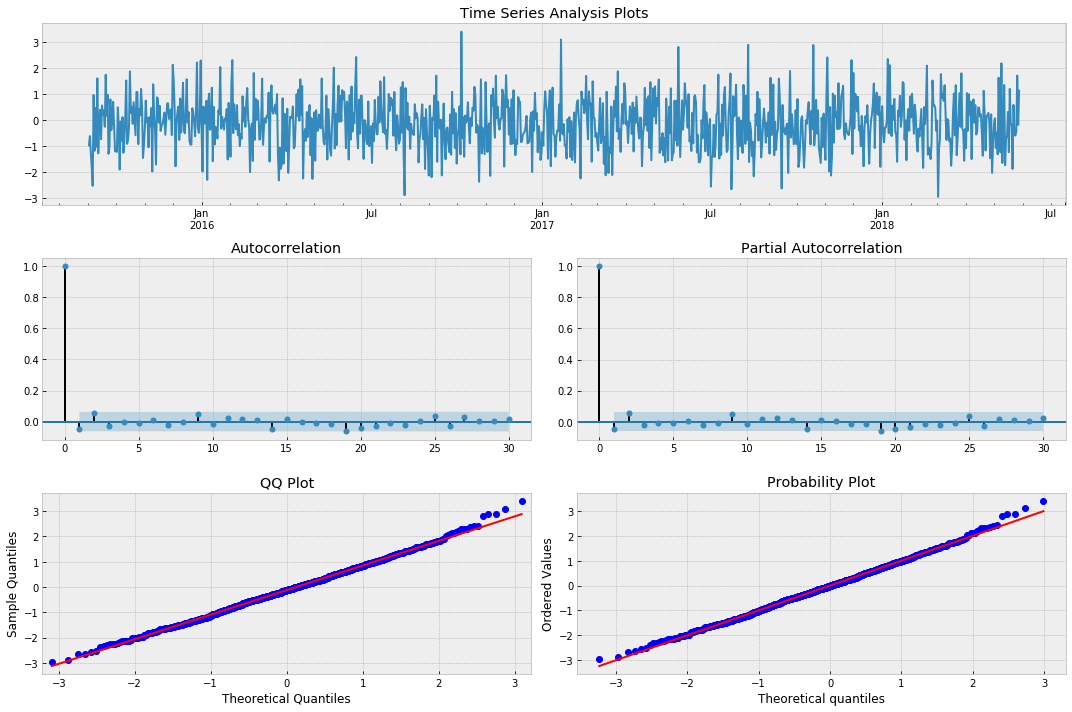

In [22]:
# Teste #1: White noise
t1_dict = generate_arima_garch_series(seed=1)
r_t1, phi_t1, theta_t1 = t1_dict['r'], t1_dict['phi'], t1_dict['theta']
ts_t1 = r2df(r_t1)

# Imprime parametros
print('Coeficientes AR (inclui constante): phi = ' + str(phi_t1))
print('Coeficientes MA (inclui coef[0]=1): theta = ' + str(theta_t1))

test_model(ts_t1)

## 2. AR models

### 2.1 AR(1)

#### 2.1.1 Gera dados

Coeficientes AR (inclui constante): phi = [0, 0.8]
Coeficientes MA (inclui coef[0]=1): theta = [1.]


    KPSS Stationarity Test Results   
Test Statistic                  0.209
P-value                         0.251
Lags                               22
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.

-----------------------------------------------------

   Augmented Dickey-Fuller Results   
Test Statistic                 -9.679
P-value                         0.000
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


     Phillips-Perron Test (Z-tau)    
Test Statistic                 -9.968
P-value                         0.000
Lags                               22
-------------------------------------

Trend: Constant


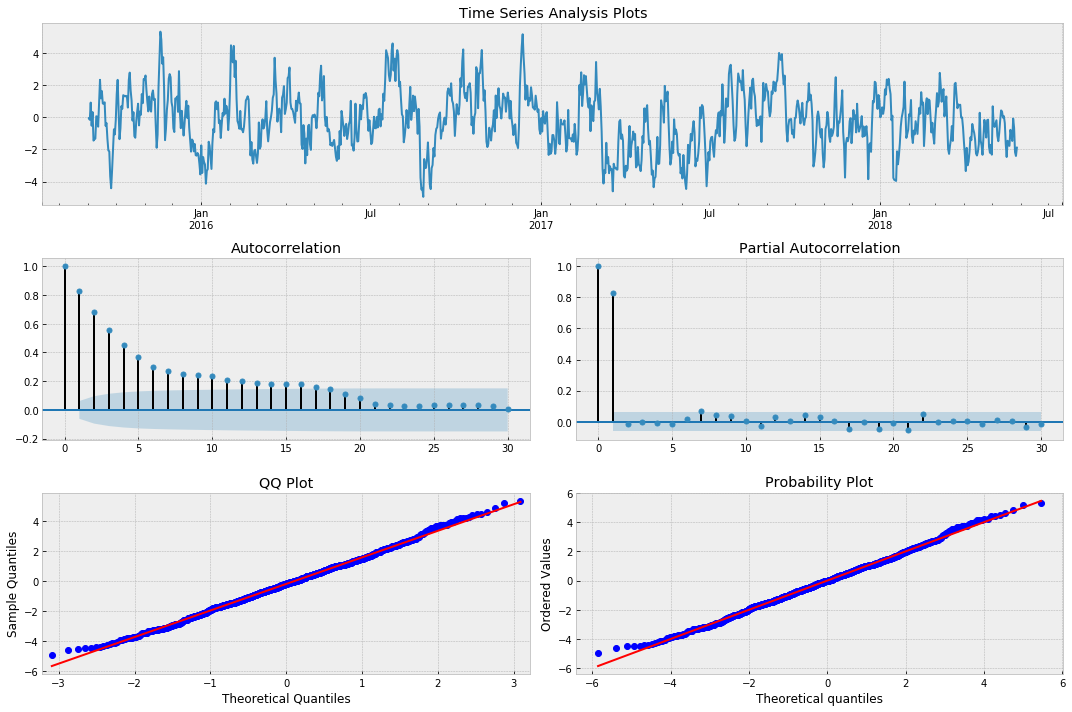

In [23]:
# Teste #2.1: AR(1)
t2_1_dict = generate_arima_garch_series(p=1, phi=[0, 0.8], seed=21)
r_t2_1, phi_t2_1, theta_t2_1 = t2_1_dict['r'], t2_1_dict['phi'], t2_1_dict['theta']
df_t2_1 = r2df(r_t2_1)

# Split treinamento-teste
n_train = int(np.ceil(0.8*len(r_t2_1)))
n_test = len(r_t2_1) - n_train
r_t2_1_train, r_t2_1_test = r_t2_1[:n_train], r_t2_1[n_train:] # 80% treinamento
df_t2_1_train, df_t2_1_test = df_t2_1.iloc[:n_train], df_t2_1.iloc[n_train:]

# Imprime parametros
print('Coeficientes AR (inclui constante): phi = ' + str(phi_t2_1))
print('Coeficientes MA (inclui coef[0]=1): theta = ' + str(theta_t2_1))

test_model(df_t2_1)

#### 2.1.2 Ajusta modelo

In [24]:
# Validacao: funcao que itera para achar melhor ordem de modelo
ordem, aic, todo_aic = best_model_order(ts=df_t2_1_train, p_rng=range(4), q_rng=range(4))

0 0 / 0 1 / 0 2 / 0 3 / 

/opt/anaconda3/envs/crypto-env/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

/opt/anaconda3/envs/crypto-env/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.



1 0 / 1 1 / 1 2 / 1 3 / 2 0 / 2 1 / 2 2 / 2 3 / 3 0 / 3 1 / 3 2 / 3 3 / aic: 2276.99 | order: (1, 0, 0)


In [25]:
# Modelo ARIMA (statsmodels.api)
mdl_t2_1 = sm.tsa.SARIMAX(endog=df_t2_1_train, order=(1,0,0), trend='n') # ordem pode ser estimada pelo PACF
fitted_mdl_t2_1 = mdl_t2_1.fit(solver='lbfgs')                           # ajusta modelo aos dados de treinamento

print(fitted_mdl_t2_1.summary())

                           Statespace Model Results                           
Dep. Variable:                  Value   No. Observations:                  800
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1135.678
Date:                Mon, 28 May 2018   AIC                           2275.356
Time:                        18:01:41   BIC                           2284.725
Sample:                    09-02-2015   HQIC                          2278.955
                         - 11-09-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8399      0.020     42.824      0.000       0.801       0.878
sigma2         0.9998      0.050     19.914      0.000       0.901       1.098
Ljung-Box (Q):                       33.50   Jarque-

#### 2.1.3 Analise de residuos

In [26]:
# Marretada: faz um treino utilizando a funcao ARIMA, que e' compativel com a funcao do teste de Breusch-Godfrey
tmp_mdl_t2_1 = sm.tsa.ARIMA(endog=df_t2_1_train, order=(1,0,0))   # modelo - a ordem pode ser estimada pelo PACF
fitted_tmp_mdl_t2_1 = tmp_mdl_t2_1.fit(trend='c', solver='lbfgs') # ajusta modelo aos dados de treinamento
serialcorr_test(results=fitted_tmp_mdl_t2_1)


---------------------  TESTE DE BREUSCH_GODFREY  ---------------------
HIPOTESE NULA: Nao ha correlacao serial.
----------------------------------------------------------------------
Lagrange multiplier test statistic:                 17.959059755421425
P-value for Lagrange multiplier test:               0.5901052774431175
F test statistic (mesmo teste, versao alternativa): 0.8946383504179998
P-value for F test:                                 0.5943980934189476
----------------------------------------------------------------------



/opt/anaconda3/envs/crypto-env/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

/opt/anaconda3/envs/crypto-env/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.

/opt/anaconda3/envs/crypto-env/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.




------------------------  TESTE DE LJUNG-BOX  ------------------------
HIPOTESE NULA: Nao ha correlacao serial.
----------------------------------------------------------------------
Min/median/mean/max Ljung-Box test statistic:   0.1127 / 19.1854 / 16.7157 / 33.5023
Min/median/mean/max Ljung-Box p-values:         0.3740 / 0.7120 / 0.7150 / 0.9951
Significant (p<0.1) Ljung-Box test statistic:   []
Significant (<0.1) p-values for Ljung-Box test: []
----------------------------------------------------------------------


-----------------------  TESTE DE JARQUE-BERA  -----------------------
HIPOTESE NULA:
	 Os dados foram amostrados de uma distribuicao normal
----------------------------------------------------------------------
RESULTADOS:
	 Estatistica do teste: 0.93
	 P-value do teste: 0.6292
	 Assimetria estimada: 0.0832
	 Curtose estimada: 2.9907
----------------------------------------------------------------------


-----------------------  TESTE DE SHAPIRO-WILK  ----------------

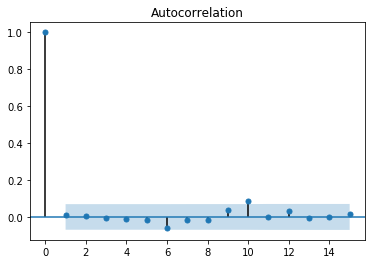

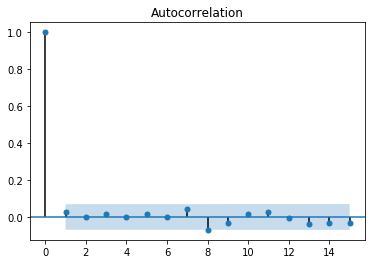

In [27]:
resid = fitted_mdl_t2_1.resid
test_serialcorr_ljung_box(data=resid)    # o residuo apresenta autocorrelacao? PREMISSA: homocedasticidade
test_normality_jarque_bera(resid)        # o residuo e' normalmente distribuido (1)?
test_normality_shapiro_wilk(resid)       # o residuo e' normalmente distribuido (2)?
test_serialcorr_ljung_box(data=resid**2) # os quadrados dos residuos apresentam autocorrelacao? PREMISSA: homocedastic.
test_cond_het_engle(resid)               # ha heterocedasticidade (ARCH effects) nos residuos?
_ = smt.graphics.plot_acf(resid, lags=15)
_ = smt.graphics.plot_acf(resid**2, lags=15)

#### 2.1.4 Predicao

In [104]:
# Predicao in-sample
df_pred_t2_1_train = df_t2_1_train.copy()
df_pred_t2_1_train['Predicted'] = fitted_mdl_t2_1.predict()

# Predicao out-of-sample (purged)
purge_size = max(list(fitted_mdl_t2_1.specification[it] for it in ['k_ar','k_ma']))
test_mdl_t2_1 = sm.tsa.SARIMAX(endog=df_t2_1_test[purge_size:], order=(1,0,0), trend='n')
pred_mdl_t2_1 = test_mdl_t2_1.filter(fitted_mdl_t2_1.params)

df_pred_t2_1_test = df_t2_1_test.iloc[purge_size:].copy()
df_pred_t2_1_test['One-step'] = pred_mdl_t2_1.predict()
df_pred_t2_1_test['Multistep'] = fitted_mdl_t2_1.forecast(steps=len(df_pred_t2_1_test.index))

# Plota
plotscatter(df=df_pred_t2_1_train, title='Teste 2.1: AR(1)')
plotscatter(df=df_pred_t2_1_test, title='Teste 2.1: AR(1)')


In [105]:
purge_size = max(list(fitted_mdl_t2_1.specification[it] for it in ['k_ar','k_ma']))
tmp = forecast_return_volatility(df_t2_1_test[purge_size:], phi=np.array([0.8]), theta=[])
tmp['y'] = df_t2_1_test[purge_size:]
tmp['auto'] = df_pred_t2_1_test['One-step']
plotscatter(df=tmp, title='Teste 2.1: AR(1)', columns=['Pred. Return','y','auto'])

In [108]:
ts_pred = tmp['auto'].replace(0,np.nan).dropna().apply(np.sign)
# ts_pred = tmp['Pred. Return'].replace(0,np.nan).dropna().apply(np.sign)
ts_true = tmp['y'].dropna().apply(np.sign).loc[ts_pred.index]

final_mdl_quality_dict = {'ARMA{} + GARCH{}'.format((1,0,0), (0,0)):
                             classification_metrics(y_true=ts_true.values, y_pred=ts_pred.values)
                         }
final_mdl_quality = pd.DataFrame(data=final_mdl_quality_dict)
final_mdl_quality

ARMA(1, 0, 0) + GARCH(0, 0)
accuracy                             0.808081
cohen_kappa                          0.587726
f1                                   0.739726
fbeta                                0.739726
fn                                  19.000000
fp                                  19.000000
mathews_corrcoef                     0.587726
precision                            0.739726
recall                               0.739726
tn                                 106.000000
tp                                  54.000000

### 2.2 AR(5)

#### 2.2.1 Gera dados

In [30]:
# Teste #2.2: AR(5)
t2_2_dict = generate_arima_garch_series(p=5, seed=22)
r_t2_2, phi_t2_2, theta_t2_2 = t2_2_dict['r'], t2_2_dict['phi'], t2_2_dict['theta']
df_t2_2 = r2df(r_t2_2)

# Split treinamento-teste
n_train = int(np.ceil(0.8*len(r_t2_2)))
n_test = len(r_t2_2) - n_train
r_t2_2_train, r_t2_2_test = r_t2_2[:n_train], r_t2_2[n_train:] # 80% treinamento
df_t2_2_train, df_t2_2_test = df_t2_2.iloc[:n_train], df_t2_2.iloc[n_train:]

# Imprime parametros
print('Coeficientes AR (inclui constante): phi = ' + str(phi_t2_2))
print('Coeficientes MA (inclui coef[0]=1): theta = ' + str(theta_t2_2))

# test_model(df_t2_2)

Coeficientes AR (inclui constante): phi = [ 0.40387577 -0.40484347  0.53598548  0.37643665 -0.22563304  0.23041165]
Coeficientes MA (inclui coef[0]=1): theta = [1.]


#### 2.2.2 Ajusta modelo

In [31]:
# Validacao: funcao que itera para achar melhor ordem de modelo
ordem, aic, todo_aic = best_model_order(ts=df_t2_2_train['Value'], p_rng=range(7), q_rng=range(4))

0 0 / 0 1 / 0 2 / 0 3 / 1 0 / 

/opt/anaconda3/envs/crypto-env/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

/opt/anaconda3/envs/crypto-env/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.



1 1 / 1 2 / 1 3 / 2 0 / 2 1 / 2 2 / 2 3 / 3 0 / 3 1 / 3 2 / 3 3 / 4 0 / 4 1 / 4 2 / 4 3 / 5 0 / 5 1 / 5 2 / 5 3 / 6 0 / 6 1 / 6 2 / 6 3 / aic: 2337.61 | order: (5, 0, 0)


In [32]:
# Modelo ARIMA (statsmodels.api)
mdl_t2_2 = sm.tsa.SARIMAX(endog=df_t2_2_train, order=(5,0,0), trend='c') # a ordem pode ser estimada pelo PACF
fitted_mdl_t2_2 = mdl_t2_2.fit(solver='lbfgs', maxiter=200)   # ajusta modelo aos dados de treinamento

print(fitted_mdl_t2_2.summary())

                           Statespace Model Results                           
Dep. Variable:                  Value   No. Observations:                  800
Model:               SARIMAX(5, 0, 0)   Log Likelihood               -1161.805
Date:                Mon, 28 May 2018   AIC                           2337.610
Time:                        18:01:53   BIC                           2370.402
Sample:                    09-02-2015   HQIC                          2350.207
                         - 11-09-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4700      0.070      6.750      0.000       0.334       0.606
ar.L1         -0.4214      0.035    -12.138      0.000      -0.489      -0.353
ar.L2          0.5429      0.038     14.405      0.0

#### 2.2.3 Analise de residuos

In [33]:
tmp_mdl_t2_2 = sm.tsa.ARIMA(endog=df_t2_2_train, order=(5,0,0)) # define modelo - a ordem pode ser estimada pelo PACF
fitted_tmp_mdl_t2_2 = tmp_mdl_t2_2.fit(trend='c', solver='lbfgs')   # ajusta modelo aos dados de treinamento
serialcorr_test(results=fitted_tmp_mdl_t2_2)

/opt/anaconda3/envs/crypto-env/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

/opt/anaconda3/envs/crypto-env/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.




---------------------  TESTE DE BREUSCH_GODFREY  ---------------------
HIPOTESE NULA: Nao ha correlacao serial.
----------------------------------------------------------------------
Lagrange multiplier test statistic:                 14.559510309011614
P-value for Lagrange multiplier test:               0.8010335003617115
F test statistic (mesmo teste, versao alternativa): 0.7544381289057233
P-value for F test:                                 0.7697046712501017
----------------------------------------------------------------------



/opt/anaconda3/envs/crypto-env/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.




------------------------  TESTE DE LJUNG-BOX  ------------------------
HIPOTESE NULA: Nao ha correlacao serial.
----------------------------------------------------------------------
Min/median/mean/max Ljung-Box test statistic:   0.0311 / 15.5989 / 20.3337 / 48.7924
Min/median/mean/max Ljung-Box p-values:         0.1605 / 0.5193 / 0.5461 / 0.9956
Significant (p<0.1) Ljung-Box test statistic:   []
Significant (<0.1) p-values for Ljung-Box test: []
----------------------------------------------------------------------


-----------------------  TESTE DE JARQUE-BERA  -----------------------
HIPOTESE NULA:
	 Os dados foram amostrados de uma distribuicao normal
----------------------------------------------------------------------
RESULTADOS:
	 Estatistica do teste: 1.04
	 P-value do teste: 0.5955
	 Assimetria estimada: 0.0810
	 Curtose estimada: 3.0697
----------------------------------------------------------------------


-----------------------  TESTE DE SHAPIRO-WILK  ----------------

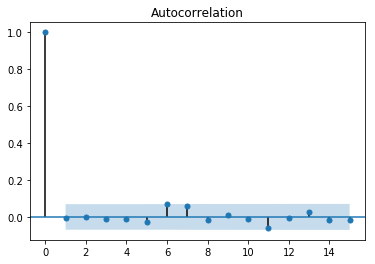

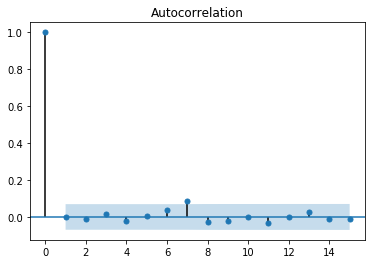

In [34]:
resid = fitted_mdl_t2_2.resid
test_serialcorr_ljung_box(data=resid)    # o residuo apresenta autocorrelacao? PREMISSA: homocedasticidade
test_normality_jarque_bera(resid)        # o residuo e' normalmente distribuido (1)?
test_normality_shapiro_wilk(resid)       # o residuo e' normalmente distribuido (2)?
test_serialcorr_ljung_box(data=resid**2) # os quadrados dos residuos apresentam autocorrelacao? PREMISSA: homocedastic.
test_cond_het_engle(resid)               # ha heterocedasticidade (ARCH effects) nos residuos?
_ = smt.graphics.plot_acf(resid, lags=15)
_ = smt.graphics.plot_acf(resid**2, lags=15)

#### 2.2.4 Predicao

In [110]:
# Predicao in-sample
df_pred_t2_2_train = df_t2_2_train.copy()
df_pred_t2_2_train['Predicted'] = fitted_mdl_t2_2.predict()

# Predicao out-of-sample (purged)
purge_size = max(list(fitted_mdl_t2_2.specification[it] for it in ['k_ar','k_ma']))
test_mdl_t2_2 = sm.tsa.SARIMAX(endog=df_t2_2_test[purge_size:], order=(5,0,0), trend='c')
pred_mdl_t2_2 = test_mdl_t2_2.filter(fitted_mdl_t2_2.params)

df_pred_t2_2_test = df_t2_2_test.iloc[purge_size:].copy()
df_pred_t2_2_test['One-step'] = pred_mdl_t2_2.predict()
df_pred_t2_2_test['Multistep'] = fitted_mdl_t2_2.forecast(steps=len(df_pred_t2_2_test.index))

# Plota
plotscatter(df=df_pred_t2_2_train, title='Teste 2.2: AR(5)')
plotscatter(df=df_pred_t2_2_test, title='Teste 2.2: AR(5)')


In [117]:
purge_size = max(list(fitted_mdl_t2_2.specification[it] for it in ['k_ar','k_ma']))

fitted_mdl = fitted_mdl_t2_2
p = fitted_mdl.specification['k_ar'] 
if p>0: phi=fitted_mdl.arparams
else: phi=[]
q = fitted_mdl.specification['k_ma'] 
if q>0: theta=fitted_mdl.maparams 
else: theta=[]

tmp= forecast_return_volatility(df_t2_2_test[purge_size:], mu=fitted_mdl.params.intercept, phi=phi, theta=theta)
tmp['y'] = df_t2_2_test[purge_size:]
tmp['auto'] = df_pred_t2_2_test['One-step']
plotscatter(df=tmp, title='Teste 2.2: AR(5)', columns=['Pred. Return','y','auto'])

In [119]:
ts_pred = tmp['auto'].replace(0,np.nan).dropna().apply(np.sign)
# ts_pred = tmp['Pred. Return'].replace(0,np.nan).dropna().apply(np.sign)
ts_true = tmp['y'].dropna().apply(np.sign).loc[ts_pred.index]

final_mdl_quality_dict = {'ARMA{} + GARCH{}'.format((5,0,0), (0,0)):
                             classification_metrics(y_true=ts_true.values, y_pred=ts_pred.values)
                         }
final_mdl_quality = pd.DataFrame(data=final_mdl_quality_dict)
final_mdl_quality

ARMA(5, 0, 0) + GARCH(0, 0)
accuracy                             0.835897
cohen_kappa                          0.628262
f1                                   0.877863
fbeta                                0.877863
fn                                  13.000000
fp                                  19.000000
mathews_corrcoef                     0.629793
precision                            0.858209
recall                               0.898438
tn                                  48.000000
tp                                 115.000000

## 3. MA models

### 3.1 MA(1)

#### 3.1.1 Gera dados

In [37]:
# Teste #3.1: MA(1)
t3_1_dict = generate_arima_garch_series(q=1, theta=[1, 0.8], seed=31)
r_t3_1, phi_t3_1, theta_t3_1 = t3_1_dict['r'], t3_1_dict['phi'], t3_1_dict['theta']
df_t3_1 = r2df(r_t3_1)

# Split treinamento-teste
n_train = int(np.ceil(0.8*len(r_t3_1)))
n_test = len(r_t3_1) - n_train
r_t3_1_train, r_t3_1_test = r_t3_1[:n_train], r_t3_1[n_train:] # 80% treinamento
df_t3_1_train, df_t3_1_test = df_t3_1.iloc[:n_train], df_t3_1.iloc[n_train:]

# Imprime parametros
print('Coeficientes AR (inclui constante): phi = ' + str(phi_t3_1))
print('Coeficientes MA (inclui coef[0]=1): theta = ' + str(theta_t3_1))

# test_model(df_t3_1)

Coeficientes AR (inclui constante): phi = [-0.42789236]
Coeficientes MA (inclui coef[0]=1): theta = [1, 0.8]


#### 3.1.2 Ajusta modelo

In [38]:
# Validacao: funcao que itera para achar melhor ordem de modelo
ordem, aic, todo_aic = best_model_order(ts=df_t3_1_train['Value'], p_rng=range(4), q_rng=range(4))

0 0 / 0 1 / 0 2 / 

/opt/anaconda3/envs/crypto-env/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

/opt/anaconda3/envs/crypto-env/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.



0 3 / 1 0 / 1 1 / 1 2 / 1 3 / 2 0 / 2 1 / 2 2 / 2 3 / 3 0 / 3 1 / 3 2 / 3 3 / aic: 2286.01 | order: (0, 0, 1)


In [39]:
# Modelo ARIMA com p=0, d=0, q=1 (statsmodels.api)
mdl_t3_1 = sm.tsa.SARIMAX(endog=df_t3_1_train, order=(0,0,1), trend='c') # a ordem pode ser estimada pelo ACF
fitted_mdl_t3_1 = mdl_t3_1.fit(solver='lbfgs')   # ajusta modelo aos dados de treinamento

print(fitted_mdl_t3_1.summary())

                           Statespace Model Results                           
Dep. Variable:                  Value   No. Observations:                  800
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -1140.007
Date:                Mon, 28 May 2018   AIC                           2286.013
Time:                        18:01:57   BIC                           2300.067
Sample:                    09-02-2015   HQIC                          2291.412
                         - 11-09-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.5066      0.065     -7.807      0.000      -0.634      -0.379
ma.L1          0.8143      0.021     39.580      0.000       0.774       0.855
sigma2         1.0108      0.050     20.140      0.0

#### 3.1.3 Analise de residuos

In [40]:
tmp_mdl_t3_1 = sm.tsa.ARIMA(endog=df_t3_1_train, order=(0,0,1))   # a ordem pode ser estimada pelo ACF
fitted_tmp_mdl_t3_1 = tmp_mdl_t3_1.fit(trend='c', solver='lbfgs') # ajusta modelo aos dados de treinamento
serialcorr_test(results=fitted_tmp_mdl_t3_1)


---------------------  TESTE DE BREUSCH_GODFREY  ---------------------
HIPOTESE NULA: Nao ha correlacao serial.
----------------------------------------------------------------------
Lagrange multiplier test statistic:                 14.229198418624378
P-value for Lagrange multiplier test:               0.8186874470353799
F test statistic (mesmo teste, versao alternativa): 0.73504655371683
P-value for F test:                                 0.7915570343203047
----------------------------------------------------------------------



/opt/anaconda3/envs/crypto-env/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

/opt/anaconda3/envs/crypto-env/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.

/opt/anaconda3/envs/crypto-env/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.




------------------------  TESTE DE LJUNG-BOX  ------------------------
HIPOTESE NULA: Nao ha correlacao serial.
----------------------------------------------------------------------
Min/median/mean/max Ljung-Box test statistic:   1.1529 / 14.5464 / 16.3914 / 35.3343
Min/median/mean/max Ljung-Box p-values:         0.2829 / 0.7483 / 0.7236 / 0.9227
Significant (p<0.1) Ljung-Box test statistic:   []
Significant (<0.1) p-values for Ljung-Box test: []
----------------------------------------------------------------------


-----------------------  TESTE DE JARQUE-BERA  -----------------------
HIPOTESE NULA:
	 Os dados foram amostrados de uma distribuicao normal
----------------------------------------------------------------------
RESULTADOS:
	 Estatistica do teste: 1.12
	 P-value do teste: 0.5719
	 Assimetria estimada: -0.0898
	 Curtose estimada: 3.0353
----------------------------------------------------------------------


-----------------------  TESTE DE SHAPIRO-WILK  ---------------

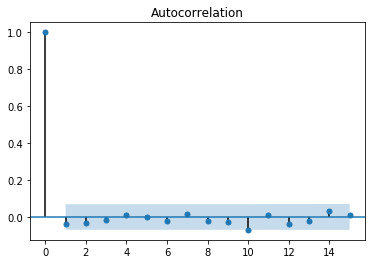

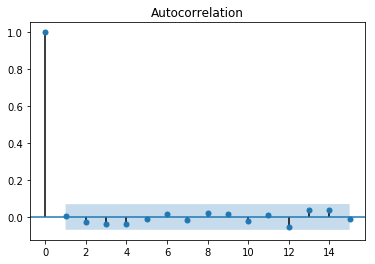

In [41]:
resid = fitted_mdl_t3_1.resid
test_serialcorr_ljung_box(data=resid)    # o residuo apresenta autocorrelacao? PREMISSA: homocedasticidade
test_normality_jarque_bera(resid)        # o residuo e' normalmente distribuido (1)?
test_normality_shapiro_wilk(resid)       # o residuo e' normalmente distribuido (2)?
test_serialcorr_ljung_box(data=resid**2) # os quadrados dos residuos apresentam autocorrelacao? PREMISSA: homocedastic.
test_cond_het_engle(resid)               # ha heterocedasticidade (ARCH effects) nos residuos?
_ = smt.graphics.plot_acf(resid, lags=15)
_ = smt.graphics.plot_acf(resid**2, lags=15)

#### 3.1.4 Predicao

In [120]:
# Predicao in-sample
df_pred_t3_1_train = df_t3_1_train.copy()
df_pred_t3_1_train['Predicted'] = fitted_mdl_t3_1.predict()

# Predicao out-of-sample (purged)
purge_size = max(list(fitted_mdl_t3_1.specification[it] for it in ['k_ar','k_ma']))
test_mdl_t3_1 = sm.tsa.SARIMAX(endog=df_t3_1_test[purge_size:], order=(0,0,1), trend='c')
pred_mdl_t3_1 = test_mdl_t3_1.filter(fitted_mdl_t3_1.params)

df_pred_t3_1_test = df_t3_1_test.iloc[purge_size:].copy()
df_pred_t3_1_test['One-step'] = pred_mdl_t3_1.predict()
df_pred_t3_1_test['Multistep'] = fitted_mdl_t3_1.forecast(steps=len(df_pred_t3_1_test.index))

# Plota
plotscatter(df=df_pred_t3_1_train, title='Teste 3.1: MA(1)')
plotscatter(df=df_pred_t3_1_test, title='Teste 3.1: MA(1)')


In [121]:
purge_size = max(list(fitted_mdl_t3_1.specification[it] for it in ['k_ar','k_ma']))

fitted_mdl = fitted_mdl_t3_1
p = fitted_mdl.specification['k_ar'] 
if p>0: phi=fitted_mdl.arparams
else: phi=[]
q = fitted_mdl.specification['k_ma'] 
if q>0: theta=fitted_mdl.maparams 
else: theta=[]
mu = fitted_mdl.params.intercept

tmp= forecast_return_volatility(df_t3_1_test[purge_size:], mu, phi=phi, theta=theta)
tmp['y'] = df_t3_1_test[purge_size:]
tmp['auto'] = df_pred_t3_1_test['One-step']
plotscatter(df=tmp, title='Teste 3_1: MA(1)', columns=['Pred. Return','y','auto'])

In [123]:
# ts_pred = tmp['auto'].replace(0,np.nan).dropna().apply(np.sign)
ts_pred = tmp['Pred. Return'].replace(0,np.nan).dropna().apply(np.sign)
ts_true = tmp['y'].dropna().apply(np.sign).loc[ts_pred.index]

final_mdl_quality_dict = {'ARMA{} + GARCH{}'.format((0,0,1), (0,0)):
                             classification_metrics(y_true=ts_true.values, y_pred=ts_pred.values)
                         }
final_mdl_quality = pd.DataFrame(data=final_mdl_quality_dict)
final_mdl_quality

ARMA(0, 0, 1) + GARCH(0, 0)
accuracy                             0.708543
cohen_kappa                          0.354763
f1                                   0.573529
fbeta                                0.573529
fn                                  35.000000
fp                                  23.000000
mathews_corrcoef                     0.357967
precision                            0.629032
recall                               0.527027
tn                                 102.000000
tp                                  39.000000

### 3.2 MA(4)

#### 3.2.1 Gera dados

In [44]:
# Teste #3.2: MA(4)
t3_2_dict = generate_arima_garch_series(q=4, seed=32)
r_t3_2, phi_t3_2, theta_t3_2 = t3_2_dict['r'], t3_2_dict['phi'], t3_2_dict['theta']
df_t3_2 = r2df(r_t3_2)

# Split treinamento-teste
n_train = int(np.ceil(0.8*len(r_t3_2)))
n_test = len(r_t3_2) - n_train
r_t3_2_train, r_t3_2_test = r_t3_2[:n_train], r_t3_2[n_train:] # 80% treinamento
df_t3_2_train, df_t3_2_test = df_t3_2.iloc[:n_train], df_t3_2.iloc[n_train:]

# Imprime parametros
print('Coeficientes AR (inclui constante): phi = ' + str(phi_t3_2))
print('Coeficientes MA (inclui coef[0]=1): theta = ' + str(theta_t3_2))

# test_model(df_t3_2)

Coeficientes AR (inclui constante): phi = [0.71777853]
Coeficientes MA (inclui coef[0]=1): theta = [ 1.         -0.11657302  0.10297557  0.40742498  0.17880246]


#### 3.2.2 Ajusta modelo

In [45]:
# Validacao: funcao que itera para achar melhor ordem de modelo
ordem, aic, todo_aic = best_model_order(ts=df_t3_2_train['Value'], p_rng=range(4), q_rng=range(7))

0 0 / 0 1 / 0 2 / 0 3 / 

/opt/anaconda3/envs/crypto-env/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

/opt/anaconda3/envs/crypto-env/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.



0 4 / 0 5 / 0 6 / 1 0 / 1 1 / 1 2 / 1 3 / 1 4 / 1 5 / 1 6 / 2 0 / 2 1 / 2 2 / 2 3 / 2 4 / 2 5 / 2 6 / 3 0 / 3 1 / 3 2 / 3 3 / 3 4 / 3 5 / 3 6 / aic: 2298.92 | order: (0, 0, 4)


In [46]:
# Modelo ARIMA com p=0, d=0, q=4 (statsmodels.api)
mdl_t3_2 = sm.tsa.SARIMAX(endog=df_t3_2_train, order=(0,0,4), trend='c') # a ordem pode ser estimada pelo ACF
fitted_mdl_t3_2 = mdl_t3_2.fit(solver='lbfgs',maxiter=300)   # ajusta modelo aos dados de treinamento

print(fitted_mdl_t3_2.summary())

                           Statespace Model Results                           
Dep. Variable:                  Value   No. Observations:                  800
Model:               SARIMAX(0, 0, 4)   Log Likelihood               -1143.458
Date:                Mon, 28 May 2018   AIC                           2298.916
Time:                        18:02:13   BIC                           2327.024
Sample:                    09-02-2015   HQIC                          2309.714
                         - 11-09-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7506      0.063     11.954      0.000       0.628       0.874
ma.L1         -0.0439      0.035     -1.242      0.214      -0.113       0.025
ma.L2          0.1209      0.032      3.778      0.0

#### 3.2.3 Analise de residuos

In [47]:
tmp_mdl_t3_2 = sm.tsa.ARIMA(endog=df_t3_2_train, order=(0,0,4)) # define modelo - a ordem pode ser estimada pelo ACF
fitted_tmp_mdl_t3_2 = tmp_mdl_t3_2.fit(trend='c', solver='lbfgs')   # ajusta modelo aos dados de treinamento
serialcorr_test(results=fitted_tmp_mdl_t3_2)

/opt/anaconda3/envs/crypto-env/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

/opt/anaconda3/envs/crypto-env/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.

/opt/anaconda3/envs/crypto-env/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.




---------------------  TESTE DE BREUSCH_GODFREY  ---------------------
HIPOTESE NULA: Nao ha correlacao serial.
----------------------------------------------------------------------
Lagrange multiplier test statistic:                 13.301241988739054
P-value for Lagrange multiplier test:               0.8640881360128885
F test statistic (mesmo teste, versao alternativa): 0.6588223493175827
P-value for F test:                                 0.867896322744333
----------------------------------------------------------------------




------------------------  TESTE DE LJUNG-BOX  ------------------------
HIPOTESE NULA: Nao ha correlacao serial.
----------------------------------------------------------------------
Min/median/mean/max Ljung-Box test statistic:   0.0002 / 14.2756 / 13.5250 / 28.7364
Min/median/mean/max Ljung-Box p-values:         0.6675 / 0.9080 / 0.8945 / 0.9995
Significant (p<0.1) Ljung-Box test statistic:   []
Significant (<0.1) p-values for Ljung-Box test: []
----------------------------------------------------------------------


-----------------------  TESTE DE JARQUE-BERA  -----------------------
HIPOTESE NULA:
	 Os dados foram amostrados de uma distribuicao normal
----------------------------------------------------------------------
RESULTADOS:
	 Estatistica do teste: 2.50
	 P-value do teste: 0.2859
	 Assimetria estimada: -0.0259
	 Curtose estimada: 2.7308
----------------------------------------------------------------------


-----------------------  TESTE DE SHAPIRO-WILK  ---------------

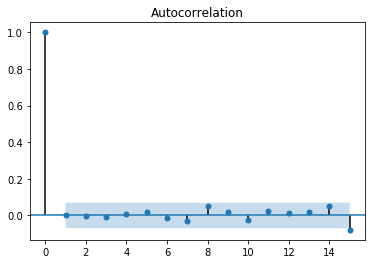

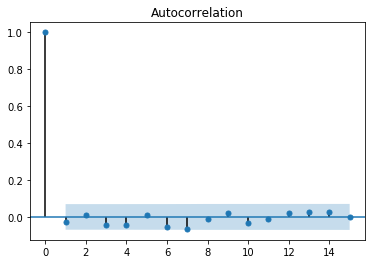

In [48]:
resid = fitted_mdl_t3_2.resid
test_serialcorr_ljung_box(data=resid)    # o residuo apresenta autocorrelacao? PREMISSA: homocedasticidade
test_normality_jarque_bera(resid)        # o residuo e' normalmente distribuido (1)?
test_normality_shapiro_wilk(resid)       # o residuo e' normalmente distribuido (2)?
test_serialcorr_ljung_box(data=resid**2) # os quadrados dos residuos apresentam autocorrelacao? PREMISSA: homocedastic.
test_cond_het_engle(resid)               # ha heterocedasticidade (ARCH effects) nos residuos?
_ = smt.graphics.plot_acf(resid, lags=15)
_ = smt.graphics.plot_acf(resid**2, lags=15)

#### 3.2.4 Predicao

In [124]:
# Predicao in-sample
df_pred_t3_2_train = df_t3_2_train.copy()
df_pred_t3_2_train['Predicted'] = fitted_mdl_t3_2.predict()

# Predicao out-of-sample (purged)
purge_size = max(list(fitted_mdl_t3_2.specification[it] for it in ['k_ar','k_ma']))
test_mdl_t3_2 = sm.tsa.SARIMAX(endog=df_t3_2_test[purge_size:], order=(0,0,4), trend='c')
pred_mdl_t3_2 = test_mdl_t3_2.filter(fitted_mdl_t3_2.params)

df_pred_t3_2_test = df_t3_2_test.iloc[purge_size:].copy()
df_pred_t3_2_test['One-step'] = pred_mdl_t3_2.predict()
df_pred_t3_2_test['Multistep'] = fitted_mdl_t3_2.forecast(steps=len(df_pred_t3_2_test.index))

# Plota
plotscatter(df=df_pred_t3_2_train, title='Teste 3.2: MA(4)')
plotscatter(df=df_pred_t3_2_test, title='Teste 3.2: MA(4)')


In [125]:
purge_size = max(list(fitted_mdl_t3_2.specification[it] for it in ['k_ar','k_ma']))

fitted_mdl = fitted_mdl_t3_2
if fitted_mdl.specification['k_ar']>0: phi=fitted_mdl.arparams
else: phi=[]
if fitted_mdl.specification['k_ma']>0: theta=fitted_mdl.maparams 
else: theta=[]
if fitted_mdl.specification['k_trend']>0: mu = fitted_mdl.params.intercept 
else: mu=0

tmp= forecast_return_volatility(df_t3_2_test[purge_size:], mu, phi=phi, theta=theta)
tmp['y'] = df_t3_2_test[purge_size:]
tmp['auto'] = df_pred_t3_2_test['One-step']
plotscatter(df=tmp, title='Teste 3_2: MA(4)', columns=['Pred. Return','y','auto'])

In [129]:
ts_pred = tmp['auto'].replace(0,np.nan).dropna().apply(np.sign)
# ts_pred = tmp['Pred. Return'].replace(0,np.nan).dropna().apply(np.sign)
ts_true = tmp['y'].dropna().apply(np.sign).loc[ts_pred.index]

final_mdl_quality_dict = {'ARMA{} + GARCH{}'.format((0,0,4), (0,0)):
                             classification_metrics(y_true=ts_true.values, y_pred=ts_pred.values)
                         }
final_mdl_quality = pd.DataFrame(data=final_mdl_quality_dict)
final_mdl_quality

ARMA(0, 0, 4) + GARCH(0, 0)
accuracy                             0.780612
cohen_kappa                          0.209677
f1                                   0.870871
fbeta                                0.870871
fn                                   1.000000
fp                                  42.000000
mathews_corrcoef                     0.318962
precision                            0.775401
recall                               0.993151
tn                                   8.000000
tp                                 145.000000

## 4. ARMA models


### 4.1 ARMA(1,1)

In [51]:
# Parametros para teste
p_t4_1 = 1
d_t4_1 = 0
q_t4_1 = 1
phi_t4_1 = [0, 0.7]
theta_t4_1 = [1, -0.4]
seed_t4_1 = 41

#### 4.1.1 Gera dados

Coeficientes AR (inclui constante): phi = [0, 0.7]
Coeficientes MA (inclui coef[0]=1): theta = [1, -0.4]


    KPSS Stationarity Test Results   
Test Statistic                  0.063
P-value                         0.794
Lags                               22
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.

-----------------------------------------------------

   Augmented Dickey-Fuller Results   
Test Statistic                -13.712
P-value                         0.000
Lags                                2
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


     Phillips-Perron Test (Z-tau)    
Test Statistic                -23.994
P-value                         0.000
Lags                               22
-------------------------------------

Trend: Constant


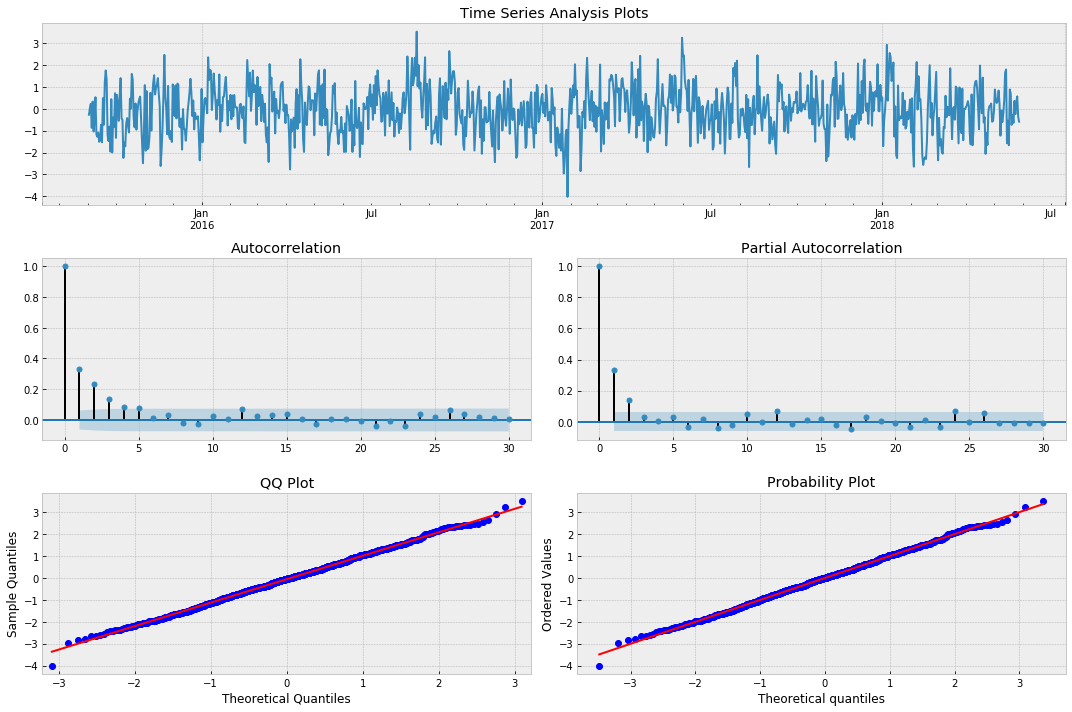

In [52]:
# Teste #4.1: ARMA(1,1)
t4_1_dict = generate_arima_garch_series(p=p_t4_1,q=q_t4_1,phi=phi_t4_1,theta=theta_t4_1,seed=seed_t4_1)
r_t4_1, phi_t4_1, theta_t4_1 = t4_1_dict['r'], t4_1_dict['phi'], t4_1_dict['theta']
df_t4_1 = r2df(r_t4_1)

# Split treinamento-teste
n_train = int(np.ceil(0.8*len(r_t4_1)))
n_test = len(r_t4_1) - n_train
r_t4_1_train, r_t4_1_test = r_t4_1[:n_train], r_t4_1[n_train:] # 80% treinamento
df_t4_1_train, df_t4_1_test = df_t4_1.iloc[:n_train], df_t4_1.iloc[n_train:]

# Imprime parametros
print('Coeficientes AR (inclui constante): phi = ' + str(phi_t4_1))
print('Coeficientes MA (inclui coef[0]=1): theta = ' + str(theta_t4_1))

test_model(df_t4_1)

#### 4.1.2 Ajusta modelo

In [53]:
# Validacao: funcao que itera para achar melhor ordem de modelo
ordem, aic, todo_aic = best_model_order(ts=df_t4_1_train['Value'], p_rng=range(6), q_rng=range(6))

0 0 / 0 1 / 0 2 / 0 3 / 0 4 / 0 5 / 

/opt/anaconda3/envs/crypto-env/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

/opt/anaconda3/envs/crypto-env/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.



1 0 / 1 1 / 1 2 / 1 3 / 1 4 / 1 5 / 2 0 / 2 1 / 2 2 / 2 3 / 2 4 / 2 5 / 3 0 / 3 1 / 3 2 / 3 3 / 3 4 / 3 5 / 4 0 / 4 1 / 4 2 / 4 3 / 4 4 / 

/opt/anaconda3/envs/crypto-env/lib/python3.6/site-packages/statsmodels/base/model.py:473: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



4 5 / 5 0 / 5 1 / 5 2 / 5 3 / 5 4 / 5 5 / aic: 2253.74 | order: (4, 0, 2)


/opt/anaconda3/envs/crypto-env/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [54]:
# Modelo ARIMA com p=1, d=0, q=1 (statsmodels.api)
mdl_t4_1 = sm.tsa.SARIMAX(endog=df_t4_1_train, order=(p_t4_1,0,q_t4_1), trend='c') # a ordem pode ser estimada pelo ACF
fitted_mdl_t4_1 = mdl_t4_1.fit(solver='lbfgs', maxiter=300)   # ajusta modelo aos dados de treinamento

print(fitted_mdl_t4_1.summary())

                           Statespace Model Results                           
Dep. Variable:                  Value   No. Observations:                  800
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1126.743
Date:                Mon, 28 May 2018   AIC                           2261.487
Time:                        18:02:43   BIC                           2280.225
Sample:                    09-02-2015   HQIC                          2268.685
                         - 11-09-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0176      0.021     -0.836      0.403      -0.059       0.024
ar.L1          0.6919      0.062     11.205      0.000       0.571       0.813
ma.L1         -0.4143      0.079     -5.276      0.0

#### 4.1.3 Analise de residuos

In [55]:
tmp_mdl_t4_1 = sm.tsa.ARIMA(endog=df_t4_1_train, order=(p_t4_1,0,q_t4_1)) # especificar ordem
fitted_tmp_mdl_t4_1 = tmp_mdl_t4_1.fit(trend='c', solver='lbfgs', maxiter=300) # ajusta modelo aos dados de treinamento
serialcorr_test(results=fitted_tmp_mdl_t4_1)


---------------------  TESTE DE BREUSCH_GODFREY  ---------------------
HIPOTESE NULA: Nao ha correlacao serial.
----------------------------------------------------------------------
Lagrange multiplier test statistic:                 12.516612727341592
P-value for Lagrange multiplier test:               0.8971484248253678
F test statistic (mesmo teste, versao alternativa): 0.6207190339380599
P-value for F test:                                 0.8994001740371683
----------------------------------------------------------------------



/opt/anaconda3/envs/crypto-env/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

/opt/anaconda3/envs/crypto-env/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.

/opt/anaconda3/envs/crypto-env/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.




------------------------  TESTE DE LJUNG-BOX  ------------------------
HIPOTESE NULA: Nao ha correlacao serial.
----------------------------------------------------------------------
Min/median/mean/max Ljung-Box test statistic:   0.0088 / 13.3767 / 18.0668 / 42.1115
Min/median/mean/max Ljung-Box p-values:         0.3133 / 0.8068 / 0.6832 / 0.9747
Significant (p<0.1) Ljung-Box test statistic:   []
Significant (<0.1) p-values for Ljung-Box test: []
----------------------------------------------------------------------


-----------------------  TESTE DE JARQUE-BERA  -----------------------
HIPOTESE NULA:
	 Os dados foram amostrados de uma distribuicao normal
----------------------------------------------------------------------
RESULTADOS:
	 Estatistica do teste: 0.36
	 P-value do teste: 0.8372
	 Assimetria estimada: -0.0256
	 Curtose estimada: 2.9103
----------------------------------------------------------------------


-----------------------  TESTE DE SHAPIRO-WILK  ---------------

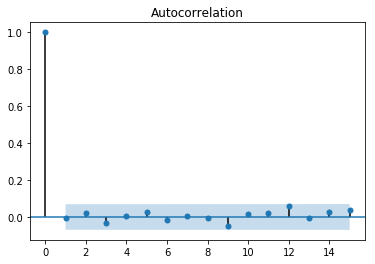

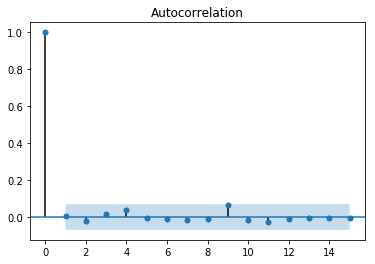

In [56]:
resid = fitted_mdl_t4_1.resid
test_serialcorr_ljung_box(data=resid)    # o residuo apresenta autocorrelacao? PREMISSA: homocedasticidade
test_normality_jarque_bera(resid)        # o residuo e' normalmente distribuido (1)?
test_normality_shapiro_wilk(resid)       # o residuo e' normalmente distribuido (2)?
test_serialcorr_ljung_box(data=resid**2) # os quadrados dos residuos apresentam autocorrelacao? PREMISSA: homocedastic.
test_cond_het_engle(resid)               # ha heterocedasticidade (ARCH effects) nos residuos?
_ = smt.graphics.plot_acf(resid, lags=15)
_ = smt.graphics.plot_acf(resid**2, lags=15)

#### 4.1.4 Predicao

In [130]:
# Predicao in-sample
df_pred_t4_1_train = df_t4_1_train.copy()
df_pred_t4_1_train['Predicted'] = fitted_mdl_t4_1.predict()

# Predicao out-of-sample (purged)
purge_size = max(list(fitted_mdl_t4_1.specification[it] for it in ['k_ar','k_ma']))
test_mdl_t4_1 = sm.tsa.SARIMAX(endog=df_t4_1_test[purge_size:], order=(p_t4_1,0,q_t4_1), trend='c')
pred_mdl_t4_1 = test_mdl_t4_1.filter(fitted_mdl_t4_1.params)

df_pred_t4_1_test = df_t4_1_test.iloc[purge_size:].copy()
df_pred_t4_1_test['One-step'] = pred_mdl_t4_1.predict()
df_pred_t4_1_test['Multistep'] = fitted_mdl_t4_1.forecast(steps=len(df_pred_t4_1_test.index))

# Plota
plotscatter(df=df_pred_t4_1_train, title='Teste 4.1: ARMA(1,1)')
plotscatter(df=df_pred_t4_1_test, title='Teste 4.1: ARMA(1,1)')


In [131]:
purge_size = max(list(fitted_mdl_t4_1.specification[it] for it in ['k_ar','k_ma']))

fitted_mdl = fitted_mdl_t4_1
if fitted_mdl.specification['k_ar']>0: phi=fitted_mdl.arparams
else: phi=[]
if fitted_mdl.specification['k_ma']>0: theta=fitted_mdl.maparams 
else: theta=[]
if fitted_mdl.specification['k_trend']>0: mu = fitted_mdl.params.intercept 
else: mu=0

tmp= forecast_return_volatility(df_t4_1_test[purge_size:], mu, phi=phi, theta=theta)
tmp['y'] = df_t4_1_test[purge_size:]
tmp['auto'] = df_pred_t4_1_test['One-step']
plotscatter(df=tmp, title='Teste 4_1: ARMA(1,1)', columns=['Pred. Return','y','auto'])

In [134]:
ts_pred = tmp['auto'].replace(0,np.nan).dropna().apply(np.sign)
# ts_pred = tmp['Pred. Return'].replace(0,np.nan).dropna().apply(np.sign)
ts_true = tmp['y'].dropna().apply(np.sign).loc[ts_pred.index]

final_mdl_quality_dict = {'ARMA{} + GARCH{}'.format((1,0,1), (0,0)):
                             classification_metrics(y_true=ts_true.values, y_pred=ts_pred.values)
                         }
final_mdl_quality = pd.DataFrame(data=final_mdl_quality_dict)
final_mdl_quality

ARMA(1, 0, 1) + GARCH(0, 0)
accuracy                             0.587940
cohen_kappa                          0.170159
f1                                   0.549451
fbeta                                0.549451
fn                                  43.000000
fp                                  39.000000
mathews_corrcoef                     0.170298
precision                            0.561798
recall                               0.537634
tn                                  67.000000
tp                                  50.000000

### 4.2 ARMA(4,3)

##### Observacao: Problema da convergencia - aumentar maxiter costuma resolver
Ref: https://stats.stackexchange.com/questions/313426/mle-convergence-errors-with-statespace-sarimax

#### 4.2.1 Gera dados

In [59]:
# Teste #4.2: ARMA(4,3)
t4_2_dict = generate_arima_garch_series(p=4, q=3, seed=42)
r_t4_2, phi_t4_2, theta_t4_2 = t4_2_dict['r'], t4_2_dict['phi'], t4_2_dict['theta']
df_t4_2 = r2df(r_t4_2)

# Split treinamento-teste
n_train = int(np.ceil(0.8*len(r_t4_2)))
n_test = len(r_t4_2) - n_train
r_t4_2_train, r_t4_2_test = r_t4_2[:n_train], r_t4_2[n_train:] # 80% treinamento
df_t4_2_train, df_t4_2_test = df_t4_2.iloc[:n_train], df_t4_2.iloc[n_train:]

# Imprime parametros
print('Coeficientes AR (inclui constante): phi = ' + str(phi_t4_2))
print('Coeficientes MA (inclui coef[0]=1): theta = ' + str(theta_t4_2))

# test_model(df_t4_2)

Coeficientes AR (inclui constante): phi = [-0.63319098 -0.39151551  0.04951286 -0.13610996 -0.41754172]
Coeficientes MA (inclui coef[0]=1): theta = [ 1.          0.22370579 -0.72101228 -0.4157107 ]


#### 4.2.2 Ajusta modelo

In [60]:
# Validacao: funcao que itera para achar melhor ordem de modelo
ordem, aic, todo_aic = best_model_order(ts=df_t4_2_train['Value'], p_rng=range(6), q_rng=range(6))

0 0 / 0 1 / 0 2 / 

/opt/anaconda3/envs/crypto-env/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

/opt/anaconda3/envs/crypto-env/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.



0 3 / 0 4 / 0 5 / 1 0 / 1 1 / 1 2 / 1 3 / 1 4 / 1 5 / 2 0 / 2 1 / 2 2 / 2 3 / 2 4 / 2 5 / 3 0 / 3 1 / 3 2 / 3 3 / 3 4 / 3 5 / 4 0 / 4 1 / 4 2 / 4 3 / 4 4 / 4 5 / 5 0 / 5 1 / 5 2 / 5 3 / 5 4 / 5 5 / aic: 2311.02 | order: (4, 0, 3)


In [61]:
# Modelo ARIMA com p=4, d=0, q=3 (statsmodels.api)
mdl_t4_2 = sm.tsa.SARIMAX(endog=df_t4_2_train, order=(4,0,3), trend='c') # a ordem pode ser estimada pelo ACF
fitted_mdl_t4_2 = mdl_t4_2.fit(solver='lbfgs', maxiter=200)   # ajusta modelo aos dados de treinamento

print(fitted_mdl_t4_2.summary())

                           Statespace Model Results                           
Dep. Variable:                  Value   No. Observations:                  800
Model:               SARIMAX(4, 0, 3)   Log Likelihood               -1147.045
Date:                Mon, 28 May 2018   AIC                           2312.090
Time:                        18:03:11   BIC                           2354.251
Sample:                    09-02-2015   HQIC                          2328.286
                         - 11-09-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.6601      0.039    -16.730      0.000      -0.737      -0.583
ar.L1         -0.3997      0.079     -5.058      0.000      -0.555      -0.245
ar.L2          0.0516      0.043      1.196      0.2

#### 4.2.3 Analise de residuos

In [62]:
tmp_mdl_t4_2 = sm.tsa.ARIMA(endog=df_t4_2_train, order=(4,0,3)) # especificar ordem
fitted_tmp_mdl_t4_2 = tmp_mdl_t4_2.fit(trend='c', solver='lbfgs', maxiter=200) # ajusta modelo aos dados de treinamento
serialcorr_test(results=fitted_tmp_mdl_t4_2)

/opt/anaconda3/envs/crypto-env/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

/opt/anaconda3/envs/crypto-env/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.




---------------------  TESTE DE BREUSCH_GODFREY  ---------------------
HIPOTESE NULA: Nao ha correlacao serial.
----------------------------------------------------------------------
Lagrange multiplier test statistic:                 10.820906363915839
P-value for Lagrange multiplier test:               0.9507353176475504
F test statistic (mesmo teste, versao alternativa): 0.5382707178438209
P-value for F test:                                 0.9508845290215072
----------------------------------------------------------------------



/opt/anaconda3/envs/crypto-env/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.




------------------------  TESTE DE LJUNG-BOX  ------------------------
HIPOTESE NULA: Nao ha correlacao serial.
----------------------------------------------------------------------
Min/median/mean/max Ljung-Box test statistic:   0.2838 / 12.4006 / 15.9175 / 42.1542
Min/median/mean/max Ljung-Box p-values:         0.3373 / 0.8720 / 0.7836 / 0.9805
Significant (p<0.1) Ljung-Box test statistic:   []
Significant (<0.1) p-values for Ljung-Box test: []
----------------------------------------------------------------------


-----------------------  TESTE DE JARQUE-BERA  -----------------------
HIPOTESE NULA:
	 Os dados foram amostrados de uma distribuicao normal
----------------------------------------------------------------------
RESULTADOS:
	 Estatistica do teste: 0.13
	 P-value do teste: 0.9362
	 Assimetria estimada: 0.0306
	 Curtose estimada: 2.9859
----------------------------------------------------------------------


-----------------------  TESTE DE SHAPIRO-WILK  ----------------

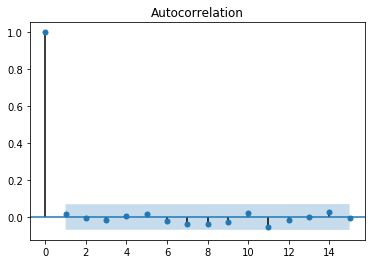

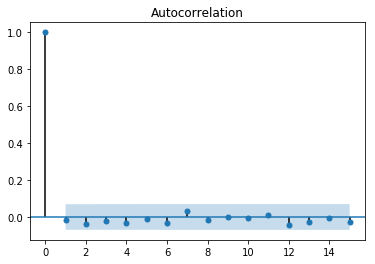

In [63]:
resid = fitted_mdl_t4_2.resid
test_serialcorr_ljung_box(data=resid)    # o residuo apresenta autocorrelacao? PREMISSA: homocedasticidade
test_normality_jarque_bera(resid)        # o residuo e' normalmente distribuido (1)?
test_normality_shapiro_wilk(resid)       # o residuo e' normalmente distribuido (2)?
test_serialcorr_ljung_box(data=resid**2) # os quadrados dos residuos apresentam autocorrelacao? PREMISSA: homocedastic.
test_cond_het_engle(resid)               # ha heterocedasticidade (ARCH effects) nos residuos?
_ = smt.graphics.plot_acf(resid, lags=15)
_ = smt.graphics.plot_acf(resid**2, lags=15)

#### 4.2.4 Predicao

In [135]:
# Predicao in-sample
df_pred_t4_2_train = df_t4_2_train.copy()
df_pred_t4_2_train['Predicted'] = fitted_mdl_t4_2.predict()

# Predicao out-of-sample (purged)
purge_size = max(list(fitted_mdl_t4_2.specification[it] for it in ['k_ar','k_ma']))
test_mdl_t4_2 = sm.tsa.SARIMAX(endog=df_t4_2_test[purge_size:], order=(4,0,3), trend='c')
pred_mdl_t4_2 = test_mdl_t4_2.filter(fitted_mdl_t4_2.params)

df_pred_t4_2_test = df_t4_2_test.iloc[purge_size:].copy()
df_pred_t4_2_test['One-step'] = pred_mdl_t4_2.predict()
df_pred_t4_2_test['Multistep'] = fitted_mdl_t4_2.forecast(steps=len(df_pred_t4_2_test.index))

# Plota
plotscatter(df=df_pred_t4_2_train, title='Teste 4.2: ARMA(4,3)')
plotscatter(df=df_pred_t4_2_test, title='Teste 4.2: ARMA(4,3)')


In [136]:
purge_size = max(list(fitted_mdl_t4_2.specification[it] for it in ['k_ar','k_ma']))

fitted_mdl = fitted_mdl_t4_2
if fitted_mdl.specification['k_ar']>0: phi=fitted_mdl.arparams
else: phi=[]
if fitted_mdl.specification['k_ma']>0: theta=fitted_mdl.maparams 
else: theta=[]
if fitted_mdl.specification['k_trend']>0: mu = fitted_mdl.params.intercept 
else: mu=0

tmp= forecast_return_volatility(df_t4_2_test[purge_size:], mu, phi=phi, theta=theta)
tmp['y'] = df_t4_2_test[purge_size:]
tmp['auto'] = df_pred_t4_2_test['One-step'] # predicted by python package
plotscatter(df=tmp, title='Teste 4_2: ARMA(4,3)', columns=['Pred. Return','y','auto'])

In [138]:
ts_pred = tmp['auto'].replace(0,np.nan).dropna().apply(np.sign)
# ts_pred = tmp['Pred. Return'].replace(0,np.nan).dropna().apply(np.sign)
ts_true = tmp['y'].dropna().apply(np.sign).loc[ts_pred.index]

final_mdl_quality_dict = {'ARMA{} + GARCH{}'.format((4,0,3), (0,0)):
                             classification_metrics(y_true=ts_true.values, y_pred=ts_pred.values)
                         }
final_mdl_quality = pd.DataFrame(data=final_mdl_quality_dict)
final_mdl_quality

ARMA(4, 0, 3) + GARCH(0, 0)
accuracy                             0.739796
cohen_kappa                          0.422464
f1                                   0.616541
fbeta                                0.616541
fn                                  32.000000
fp                                  19.000000
mathews_corrcoef                     0.427117
precision                            0.683333
recall                               0.561644
tn                                 104.000000
tp                                  41.000000

## 5. ARIMA

### 5.1 ARIMA(1,1,1)

#### 5.1.1 Gera dados

In [66]:
# Teste #5.1: ARIMA(1,1,1)
t5_1_dict = generate_arima_garch_series(p=1, d=1, q=1, seed=51)
r_t5_1, phi_t5_1, theta_t5_1 = t5_1_dict['r'], t5_1_dict['phi'], t5_1_dict['theta']
df_t5_1 = r2df(r_t5_1)

# Split treinamento-teste
n_train = int(np.ceil(0.8*len(r_t5_1)))
n_test = len(r_t5_1) - n_train
r_t5_1_train, r_t5_1_test = r_t5_1[:n_train], r_t5_1[n_train:] # 80% treinamento
df_t5_1_train, df_t5_1_test = df_t5_1.iloc[:n_train], df_t5_1.iloc[n_train:]

# Imprime parametros
print('Coeficientes AR (inclui constante): phi = ' + str(phi_t5_1))
print('Coeficientes MA (inclui coef[0]=1): theta = ' + str(theta_t5_1))

# test_model(df_t5_1)

Coeficientes AR (inclui constante): phi = [ 0.35146283 -0.91057564]
Coeficientes MA (inclui coef[0]=1): theta = [ 1.         -0.31339265]


#### 5.1.2 Ajusta modelo

##### 5.1.2.1 Abordagem: diferenciar manualmente e utilizar modelo ARMA

    KPSS Stationarity Test Results   
Test Statistic                  0.049
P-value                         0.883
Lags                               21
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.

-----------------------------------------------------

   Augmented Dickey-Fuller Results   
Test Statistic                -24.776
P-value                         0.000
Lags                                2
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


     Phillips-Perron Test (Z-tau)    
Test Statistic               -228.396
P-value                         0.000
Lags                               21
-------------------------------------

Trend: Constant


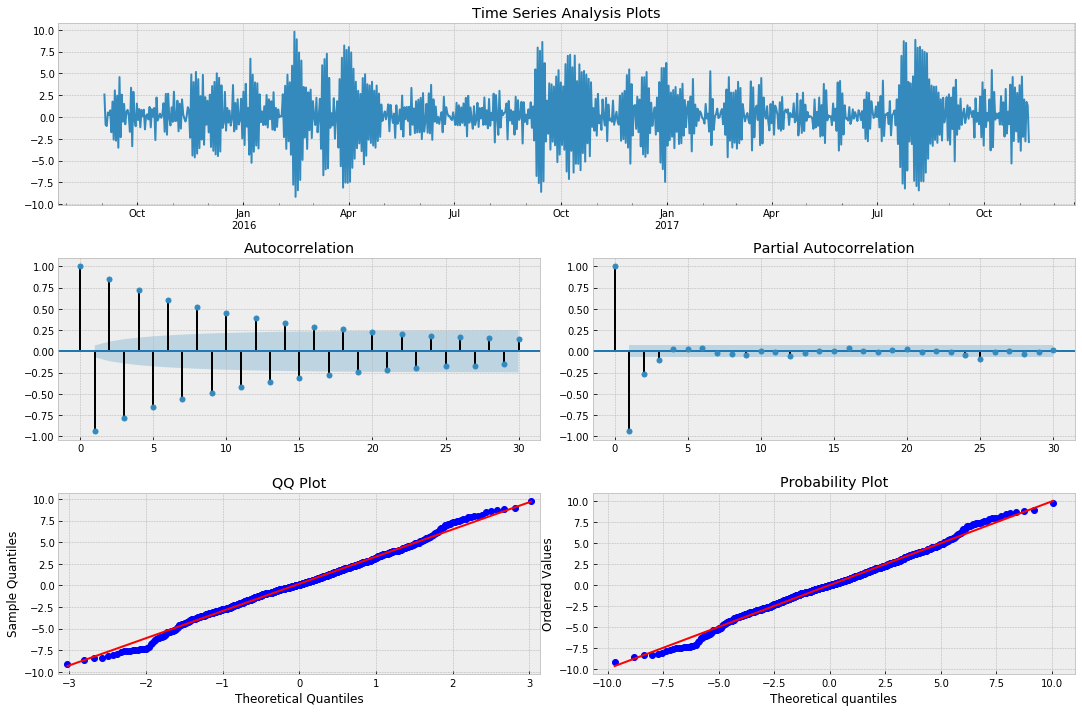

In [67]:
df_t5_1_train_diff = difference_ts(ts=df_t5_1_train)
df_t5_1_test_diff = difference_ts(ts=df_t5_1_test)
test_model(df_t5_1_train_diff)

In [68]:
# Modelo ARMA com p=1, d=0, q=1 (statsmodels.api)
mdl_t5_1 = sm.tsa.SARIMAX(endog=df_t5_1_train_diff, order=(1,0,1), trend='c') # a ordem pode ser estimada pelo ACF
fitted_mdl_t5_1 = mdl_t5_1.fit(solver='lbfgs', maxiter=200)   # ajusta modelo aos dados de treinamento

print(fitted_mdl_t5_1.summary())

                           Statespace Model Results                           
Dep. Variable:                  Value   No. Observations:                  799
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1142.035
Date:                Mon, 28 May 2018   AIC                           2292.071
Time:                        18:03:15   BIC                           2310.804
Sample:                    09-03-2015   HQIC                          2299.268
                         - 11-09-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3651      0.025     14.408      0.000       0.315       0.415
ar.L1         -0.9101      0.016    -57.700      0.000      -0.941      -0.879
ma.L1         -0.3140      0.034     -9.103      0.0

##### 5.1.2.2 Validacao: utiliza modelo ARIMA com d=1

In [69]:
# Modelo ARIMA com p=1, d=1, q=1 (statsmodels.api)
mdl_t5_1_val = sm.tsa.ARIMA(endog=df_t5_1_train, order=(1,1,1)) # especificar ordem
fitted_mdl_t5_1_val = mdl_t5_1_val.fit(trend='c', solver='lbfgs')  # ajusta modelo aos dados de treinamento

print(fitted_mdl_t5_1_val.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Value   No. Observations:                  799
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1142.035
Method:                       css-mle   S.D. of innovations              1.009
Date:                Mon, 28 May 2018   AIC                           2292.071
Time:                        18:03:15   BIC                           2310.804
Sample:                    09-03-2015   HQIC                          2299.268
                         - 11-09-2017                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1912      0.013     14.894      0.000       0.166       0.216
ar.L1.D.Value    -0.9101      0.015    -59.742      0.000      -0.940      -0.880
ma.L1.D.Value    -0.3140      0.033     

/opt/anaconda3/envs/crypto-env/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

/opt/anaconda3/envs/crypto-env/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.



#### 5.1.3 Analise de residuos

In [70]:
tmp_mdl_t5_1 = sm.tsa.ARIMA(endog=df_t5_1_train_diff, order=(1,0,1)) # especificar ordem
fitted_tmp_mdl_t5_1 = tmp_mdl_t5_1.fit(trend='c', solver='lbfgs')  # ajusta modelo aos dados de treinamento
serialcorr_test(results=fitted_tmp_mdl_t5_1)


---------------------  TESTE DE BREUSCH_GODFREY  ---------------------
HIPOTESE NULA: Nao ha correlacao serial.
----------------------------------------------------------------------
Lagrange multiplier test statistic:                 11.718486322645663
P-value for Lagrange multiplier test:               0.9254246932369614
F test statistic (mesmo teste, versao alternativa): 0.5790166668866283
P-value for F test:                                 0.9283008666387929
----------------------------------------------------------------------



/opt/anaconda3/envs/crypto-env/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

/opt/anaconda3/envs/crypto-env/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.

/opt/anaconda3/envs/crypto-env/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [71]:
fitted_tmp_mdl_t5_1.params.const

0.19115852897853297


------------------------  TESTE DE LJUNG-BOX  ------------------------
HIPOTESE NULA: Nao ha correlacao serial.
----------------------------------------------------------------------
Min/median/mean/max Ljung-Box test statistic:   0.0475 / 11.9678 / 15.7721 / 32.4780
Min/median/mean/max Ljung-Box p-values:         0.3736 / 0.7667 / 0.7533 / 0.9713
Significant (p<0.1) Ljung-Box test statistic:   []
Significant (<0.1) p-values for Ljung-Box test: []
----------------------------------------------------------------------


-----------------------  TESTE DE JARQUE-BERA  -----------------------
HIPOTESE NULA:
	 Os dados foram amostrados de uma distribuicao normal
----------------------------------------------------------------------
RESULTADOS:
	 Estatistica do teste: 0.71
	 P-value do teste: 0.7002
	 Assimetria estimada: 0.0015
	 Curtose estimada: 3.1463
----------------------------------------------------------------------


-----------------------  TESTE DE SHAPIRO-WILK  ----------------

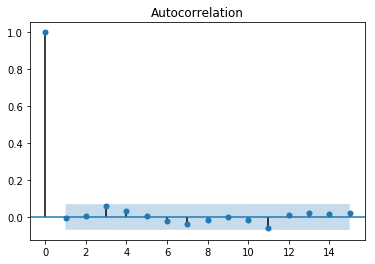

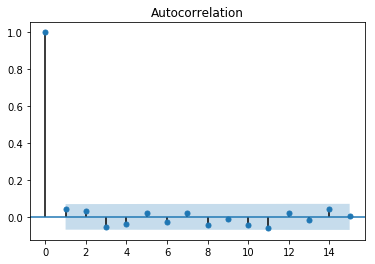

In [73]:
resid = fitted_mdl_t5_1.resid
test_serialcorr_ljung_box(data=resid)    # o residuo apresenta autocorrelacao? PREMISSA: homocedasticidade
test_normality_jarque_bera(resid)        # o residuo e' normalmente distribuido (1)?
test_normality_shapiro_wilk(resid)       # o residuo e' normalmente distribuido (2)?
test_serialcorr_ljung_box(data=resid**2) # os quadrados dos residuos apresentam autocorrelacao? PREMISSA: homocedastic.
test_cond_het_engle(resid)               # ha heterocedasticidade (ARCH effects) nos residuos?
_ = smt.graphics.plot_acf(resid, lags=15)
_ = smt.graphics.plot_acf(resid**2, lags=15)

#### 5.1.4 Predicao

In [139]:
# Predicao in-sample
df_pred_t5_1_train = df_t5_1_train_diff.copy()
df_pred_t5_1_train['Predicted'] = fitted_mdl_t5_1.predict()

# Predicao out-of-sample (purged)
purge_size = max(list(fitted_mdl_t5_1.specification[it] for it in ['k_ar','k_ma']))
test_mdl_t5_1 = sm.tsa.SARIMAX(endog=df_t5_1_test_diff[purge_size:], order=(1,0,1), trend='c')
pred_mdl_t5_1 = test_mdl_t5_1.filter(fitted_mdl_t5_1.params)

df_pred_t5_1_test = df_t5_1_test_diff.iloc[purge_size:].copy()
df_pred_t5_1_test['One-step'] = pred_mdl_t5_1.predict()
df_pred_t5_1_test['Multistep'] = fitted_mdl_t5_1.forecast(steps=len(df_pred_t5_1_test.index))

# Plota
plotscatter(df=df_pred_t5_1_train, title='Teste 5.1: ARIMA(1,1,1)')
plotscatter(df=df_pred_t5_1_test, title='Teste 5.1: ARIMA(1,1,1)')


In [140]:
purge_size = max(list(fitted_mdl_t5_1.specification[it] for it in ['k_ar','k_ma']))

fitted_mdl = fitted_mdl_t5_1
if fitted_mdl.specification['k_ar']>0: phi=fitted_mdl.arparams
else: phi=[]
if fitted_mdl.specification['k_ma']>0: theta=fitted_mdl.maparams 
else: theta=[]
if fitted_mdl.specification['k_trend']>0: mu = fitted_mdl.params.intercept 
else: mu=0

tmp= forecast_return_volatility(df_t5_1_test_diff[purge_size:], mu, phi=phi, theta=theta)
tmp['y'] = df_t5_1_test_diff[purge_size:]
tmp['auto'] = df_pred_t5_1_test['One-step'] # predicted by python package
plotscatter(df=tmp, title='Teste 5_1: ARIMA(1,0,1)', columns=['Pred. Return','y','auto'])

In [144]:
ts_pred = tmp['auto'].replace(0,np.nan).dropna().apply(np.sign)
ts_pred = tmp['Pred. Return'].replace(0,np.nan).dropna().apply(np.sign)
ts_true = tmp['y'].dropna().apply(np.sign).loc[ts_pred.index]

final_mdl_quality_dict = {'ARMA{} + GARCH{}'.format((1,1,1), (0,0)):
                             classification_metrics(y_true=ts_true.values, y_pred=ts_pred.values)
                         }
final_mdl_quality = pd.DataFrame(data=final_mdl_quality_dict)
final_mdl_quality

ARMA(1, 1, 1) + GARCH(0, 0)
accuracy                             0.919192
cohen_kappa                          0.838252
f1                                   0.921569
fbeta                                0.921569
fn                                   9.000000
fp                                   7.000000
mathews_corrcoef                     0.838423
precision                            0.930693
recall                               0.912621
tn                                  88.000000
tp                                  94.000000

### 5.2 ARIMA(4,2,4)

#### 5.2.1 Gera dados

In [76]:
# Teste #5.2: ARIMA(4,2,4)
t5_2_dict = generate_arima_garch_series(p=4, d=2, q=4, seed=52)
r_t5_2, phi_t5_2, theta_t5_2 = t5_2_dict['r'], t5_2_dict['phi'], t5_2_dict['theta']
df_t5_2 = r2df(r_t5_2)

# Split treinamento-teste
n_train = int(np.ceil(0.8*len(r_t5_2)))
n_test = len(r_t5_2) - n_train
r_t5_2_train, r_t5_2_test = r_t5_2[:n_train], r_t5_2[n_train:] # 80% treinamento
df_t5_2_train, df_t5_2_test = df_t5_2.iloc[:n_train], df_t5_2.iloc[n_train:]

# Imprime parametros
print('Coeficientes AR (inclui constante): phi = ' + str(phi_t5_2))
print('Coeficientes MA (inclui coef[0]=1): theta = ' + str(theta_t5_2))

# test_model(df_t5_2)

Coeficientes AR (inclui constante): phi = [ 0.31581774 -0.59736634  0.61697583  0.57280488 -0.21012072]
Coeficientes MA (inclui coef[0]=1): theta = [ 1.         -0.84250185 -0.02470948 -0.13122271 -0.50788411]


#### 5.2.2 Ajusta modelo

##### 5.2.2.1 Abordagem: diferenciar 2x manualmente e utilizar modelo ARMA

    KPSS Stationarity Test Results   
Test Statistic                  3.686
P-value                         0.000
Lags                               21
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.

-----------------------------------------------------

   Augmented Dickey-Fuller Results   
Test Statistic                  1.511
P-value                         0.998
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


     Phillips-Perron Test (Z-tau)    
Test Statistic                  1.159
P-value                         0.996
Lags                               21
-------------------------------------

Trend: Constant


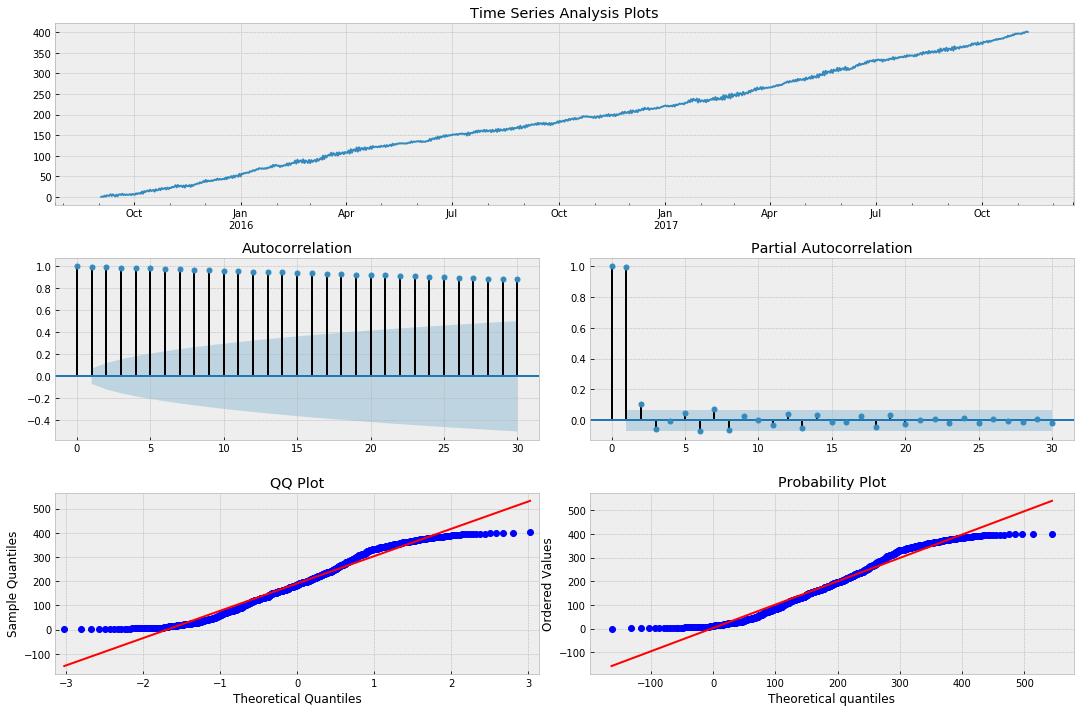

In [77]:
df_t5_2_train_diff = difference_ts(ts=df_t5_2_train)
df_t5_2_test_diff  = difference_ts(ts=df_t5_2_test)
test_model(df_t5_2_train_diff)

    KPSS Stationarity Test Results   
Test Statistic                  0.251
P-value                         0.188
Lags                               21
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.

-----------------------------------------------------

   Augmented Dickey-Fuller Results   
Test Statistic                 -9.509
P-value                         0.000
Lags                                9
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


     Phillips-Perron Test (Z-tau)    
Test Statistic               -132.021
P-value                         0.000
Lags                               21
-------------------------------------

Trend: Constant


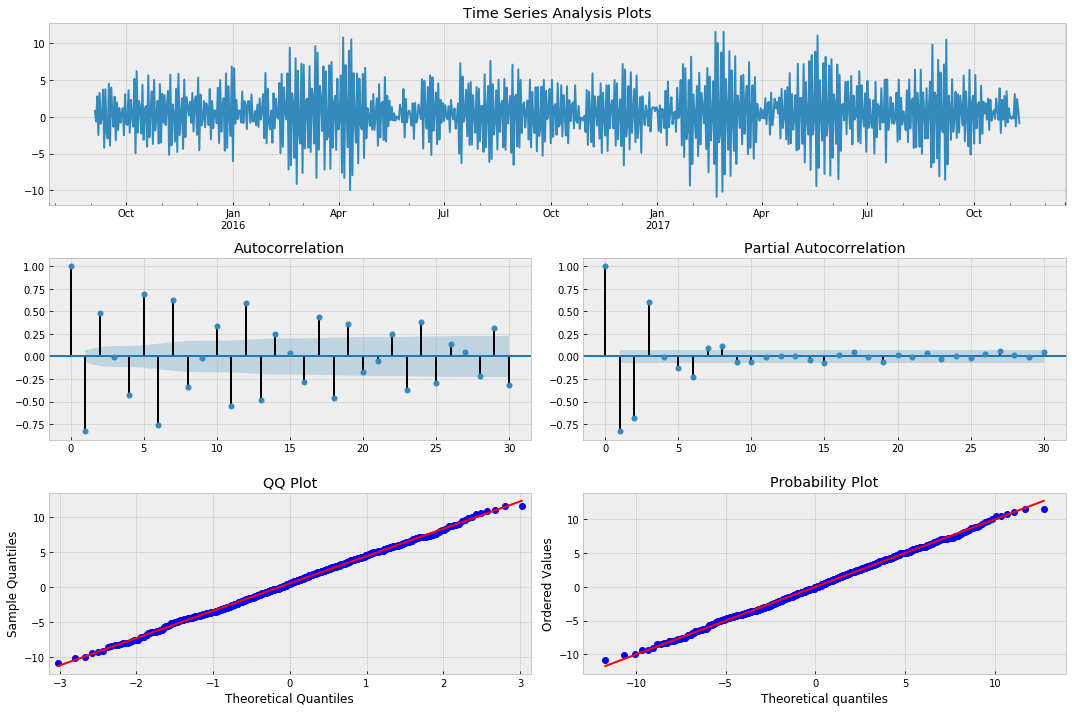

In [78]:
df_t5_2_train_diff2 = difference_ts(ts=df_t5_2_train_diff)
df_t5_2_test_diff2  = difference_ts(ts=df_t5_2_test_diff)
test_model(df_t5_2_train_diff2)

In [79]:
# Modelo ARMA com p=4, d=0, q=4 (statsmodels.api)
mdl_t5_2 = sm.tsa.SARIMAX(endog=df_t5_2_train_diff2, order=(4,0,4), trend='c') # a ordem pode ser estimada pelo ACF
fitted_mdl_t5_2 = mdl_t5_2.fit(solver='lbfgs', maxiter=500)   # ajusta modelo aos dados de treinamento

print(fitted_mdl_t5_2.summary())

                           Statespace Model Results                           
Dep. Variable:                  Value   No. Observations:                  798
Model:               SARIMAX(4, 0, 4)   Log Likelihood               -1280.843
Date:                Mon, 28 May 2018   AIC                           2581.686
Time:                        18:03:22   BIC                           2628.507
Sample:                    09-04-2015   HQIC                          2599.674
                         - 11-09-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.3705      0.599      2.290      0.022       0.197       2.544
ar.L1         -1.1898      0.388     -3.066      0.002      -1.951      -0.429
ar.L2         -0.3829      0.579     -0.661      0.5

##### 5.2.2.2 Validacao: utiliza modelo ARIMA com d=2

In [80]:
# Modelo ARIMA com p=4, d=2, q=4 (statsmodels.api)
mdl_t5_2_val = sm.tsa.ARIMA(endog=df_t5_2_train, order=(4,2,4)) # especificar ordem
fitted_mdl_t5_2_val = mdl_t5_2_val.fit(trend='c', solver='lbfgs', maxiter=500) # ajusta modelo aos dados de treinamento

print(fitted_mdl_t5_2_val.summary())

/opt/anaconda3/envs/crypto-env/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

/opt/anaconda3/envs/crypto-env/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.



                             ARIMA Model Results                              
Dep. Variable:               D2.Value   No. Observations:                  798
Model:                 ARIMA(4, 2, 4)   Log Likelihood               -1280.760
Method:                       css-mle   S.D. of innovations              1.201
Date:                Mon, 28 May 2018   AIC                           2581.519
Time:                        18:03:23   BIC                           2628.341
Sample:                    09-04-2015   HQIC                          2599.508
                         - 11-09-2017                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5025      0.033     15.341      0.000       0.438       0.567
ar.L1.D2.Value    -1.8167      0.714     -2.544      0.011      -3.216      -0.417
ar.L2.D2.Value    -1.2735      0.982

#### 5.2.3 Analise de residuos

In [81]:
tmp_mdl_t5_2 = sm.tsa.ARIMA(endog=df_t5_2_train_diff2, order=(4,0,4)) # especificar ordem
fitted_tmp_mdl_t5_2 = tmp_mdl_t5_2.fit(trend='c', solver='lbfgs')  # ajusta modelo aos dados de treinamento
serialcorr_test(results=fitted_tmp_mdl_t5_2)

/opt/anaconda3/envs/crypto-env/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

/opt/anaconda3/envs/crypto-env/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.




---------------------  TESTE DE BREUSCH_GODFREY  ---------------------
HIPOTESE NULA: Nao ha correlacao serial.
----------------------------------------------------------------------
Lagrange multiplier test statistic:                 11.742331390570486
P-value for Lagrange multiplier test:               0.9246592234339148
F test statistic (mesmo teste, versao alternativa): 0.5802036568119838
P-value for F test:                                 0.9275579069328806
----------------------------------------------------------------------



/opt/anaconda3/envs/crypto-env/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.




------------------------  TESTE DE LJUNG-BOX  ------------------------
HIPOTESE NULA: Nao ha correlacao serial.
----------------------------------------------------------------------
Min/median/mean/max Ljung-Box test statistic:   0.0005 / 12.0275 / 14.0627 / 35.8181
Min/median/mean/max Ljung-Box p-values:         0.5922 / 0.9123 / 0.8773 / 0.9998
Significant (p<0.1) Ljung-Box test statistic:   []
Significant (<0.1) p-values for Ljung-Box test: []
----------------------------------------------------------------------


-----------------------  TESTE DE JARQUE-BERA  -----------------------
HIPOTESE NULA:
	 Os dados foram amostrados de uma distribuicao normal
----------------------------------------------------------------------
RESULTADOS:
	 Estatistica do teste: 0.74
	 P-value do teste: 0.6908
	 Assimetria estimada: 0.0731
	 Curtose estimada: 2.9706
----------------------------------------------------------------------


-----------------------  TESTE DE SHAPIRO-WILK  ----------------

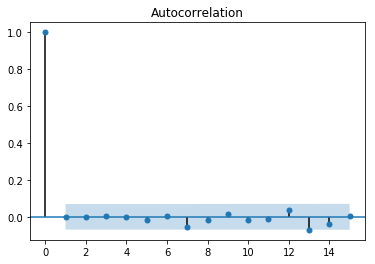

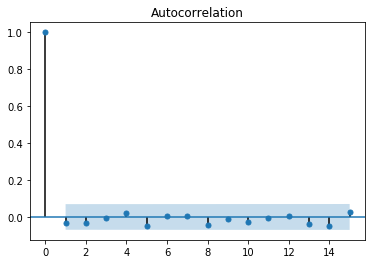

In [82]:
resid = fitted_mdl_t5_2.resid
test_serialcorr_ljung_box(data=resid)    # o residuo apresenta autocorrelacao? PREMISSA: homocedasticidade
test_normality_jarque_bera(resid)        # o residuo e' normalmente distribuido (1)?
test_normality_shapiro_wilk(resid)       # o residuo e' normalmente distribuido (2)?
test_serialcorr_ljung_box(data=resid**2) # os quadrados dos residuos apresentam autocorrelacao? PREMISSA: homocedastic.
test_cond_het_engle(resid)               # ha heterocedasticidade (ARCH effects) nos residuos?
_ = smt.graphics.plot_acf(resid, lags=15)
_ = smt.graphics.plot_acf(resid**2, lags=15)

#### 5.2.4 Predicao

In [145]:
# Predicao in-sample
df_pred_t5_2_train = df_t5_2_train_diff2.copy()
df_pred_t5_2_train['Predicted'] = fitted_mdl_t5_2.predict()

# Predicao out-of-sample (purged)
purge_size = max(list(fitted_mdl_t5_2.specification[it] for it in ['k_ar','k_ma']))
test_mdl_t5_2 = sm.tsa.SARIMAX(endog=df_t5_2_test_diff2[purge_size:], order=(4,0,4), trend='c')
pred_mdl_t5_2 = test_mdl_t5_2.filter(fitted_mdl_t5_2.params)

df_pred_t5_2_test = df_t5_2_test_diff2.iloc[purge_size:].copy()
df_pred_t5_2_test['One-step'] = pred_mdl_t5_2.predict()
df_pred_t5_2_test['Multistep'] = fitted_mdl_t5_2.forecast(steps=len(df_pred_t5_2_test.index))

# Plota
plotscatter(df=df_pred_t5_2_train, title='Teste 5.2: ARIMA(4,2,4)')
plotscatter(df=df_pred_t5_2_test, title='Teste 5.2: ARIMA(4,2,4)')


In [146]:
purge_size = max(list(fitted_mdl_t5_2.specification[it] for it in ['k_ar','k_ma']))

fitted_mdl = fitted_mdl_t5_2
if fitted_mdl.specification['k_ar']>0: phi=fitted_mdl.arparams
else: phi=[]
if fitted_mdl.specification['k_ma']>0: theta=fitted_mdl.maparams 
else: theta=[]
if fitted_mdl.specification['k_trend']>0: mu = fitted_mdl.params.intercept 
else: mu=0

tmp= forecast_return_volatility(df_t5_2_test_diff2[purge_size:], mu, phi=phi, theta=theta)
tmp['y'] = df_t5_2_test_diff2[purge_size:]
tmp['auto'] = df_pred_t5_2_test['One-step'] # predicted by python package
plotscatter(df=tmp, title='Teste 5_2: ARIMA(4,2,4)', columns=['Pred. Return','y','auto'])

In [148]:
ts_pred = tmp['auto'].replace(0,np.nan).dropna().apply(np.sign)
# ts_pred = tmp['Pred. Return'].replace(0,np.nan).dropna().apply(np.sign)
ts_true = tmp['y'].dropna().apply(np.sign).loc[ts_pred.index]

final_mdl_quality_dict = {'ARMA{} + GARCH{}'.format((4,2,4), (0,0)):
                             classification_metrics(y_true=ts_true.values, y_pred=ts_pred.values)
                         }
final_mdl_quality = pd.DataFrame(data=final_mdl_quality_dict)
final_mdl_quality

ARMA(4, 2, 4) + GARCH(0, 0)
accuracy                             0.896907
cohen_kappa                          0.791622
f1                                   0.906542
fbeta                                0.906542
fn                                   9.000000
fp                                  11.000000
mathews_corrcoef                     0.791794
precision                            0.898148
recall                               0.915094
tn                                  77.000000
tp                                  97.000000

## 6. GARCH

### 6.1 GARCH(1,1)

#### 6.1.1 Gera dados

In [86]:
# Teste #6.1: GARCH(1,1)
a_t6_1, alpha_t6_1, beta_t6_1 = generate_garch_process(m=1, s=1, alpha=[0.2, 0.6], beta=[0.3], seed=61)
df_t6_1 = r2df(a_t6_1)

# Split treinamento-teste
n_train = int(np.ceil(0.8*len(a_t6_1)))
n_test = len(a_t6_1) - n_train
a_t6_1_train, a_t6_1_test = a_t6_1[:n_train], a_t6_1[n_train:] # 80% treinamento
df_t6_1_train, df_t6_1_test = df_t6_1.iloc[:n_train], df_t6_1.iloc[n_train:]

# Imprime parametros
print('Coeficientes AR (GARCH) (inclui constante): alpha = ' + str(alpha_t6_1))
print('Coeficientes MA (GARCH):                     beta = ' + str(beta_t6_1))

# test_model(df_t6_1)

Coeficientes AR (GARCH) (inclui constante): alpha = [0.2, 0.6]
Coeficientes MA (GARCH):                     beta = [0.3]



---------  TESTE DE ENGLE PARA HETEROCEDASTICIDADE CONDICIONAL  ----------
HIPOTESE NULA: Nao ha heterocedasticidade.
--------------------------------------------------------------------------
Engle’s Lagrange multiplier test statistic:                 202.8789433769168
Engle’s p-value for Lagrange multiplier test:               3.106492003888484e-31
Engle’s F test statistic (mesmo teste, versao alternativa): 11.36182589975923
Engle’s p-value for F test:                                 1.8688523251274723e-35
--------------------------------------------------------------------------



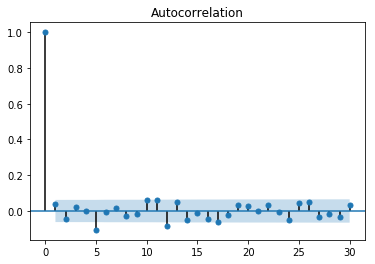

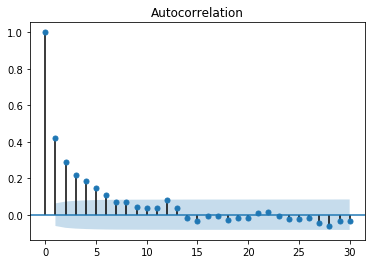

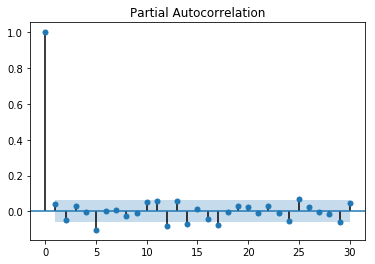

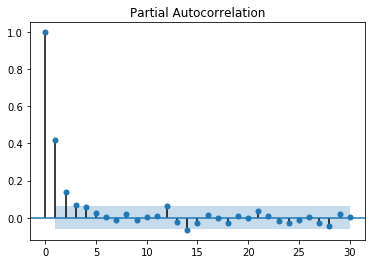

In [87]:
# Verifica propriedade do GARCH:
test_cond_het_engle(a_t6_1)
_ = smt.graphics.plot_acf(a_t6_1, lags=30)
_ = smt.graphics.plot_acf(a_t6_1**2, lags=30)
_ = smt.graphics.plot_pacf(a_t6_1, lags=30)
_ = smt.graphics.plot_pacf(a_t6_1**2, lags=30)

#### 6.1.2 Ajusta modelo

In [88]:
import arch
am_t6_1 = arch.arch_model(y=df_t6_1_train.values, mean='Zero', vol='GARCH', p=1, q=1, dist='StudentsT') # mean='Constant'
# am_t6_1.fit?
fitted_am_t6_1 = am_t6_1.fit(disp='off')


print(fitted_am_t6_1.summary())

                          Zero Mean - GARCH Model Results                           
Dep. Variable:                            y   R-squared:                       0.000
Mean Model:                       Zero Mean   Adj. R-squared:                  0.001
Vol Model:                            GARCH   Log-Likelihood:               -1112.04
Distribution:      Standardized Student's t   AIC:                           2232.07
Method:                  Maximum Likelihood   BIC:                           2250.81
                                              No. Observations:                  800
Date:                      Mon, May 28 2018   Df Residuals:                      796
Time:                              18:03:26   Df Model:                            4
                            Volatility Model                            
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0

#### 6.1.3 Analise de residuos


---------  TESTE DE ENGLE PARA HETEROCEDASTICIDADE CONDICIONAL  ----------
HIPOTESE NULA: Nao ha heterocedasticidade.
--------------------------------------------------------------------------
Engle’s Lagrange multiplier test statistic:                 174.46629107137898
Engle’s p-value for Lagrange multiplier test:               3.5210813516985506e-26
Engle’s F test statistic (mesmo teste, versao alternativa): 10.403215410994822
Engle’s p-value for F test:                                 4.790778284783653e-30
--------------------------------------------------------------------------



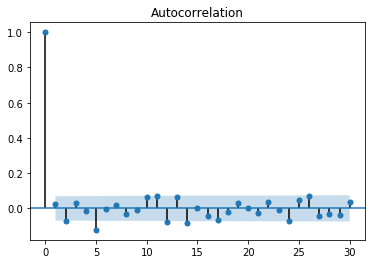

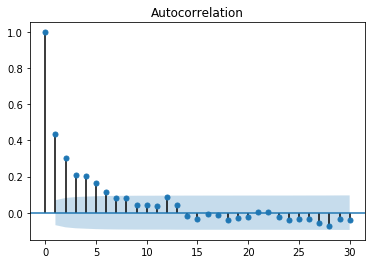

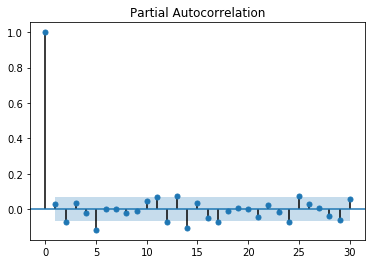

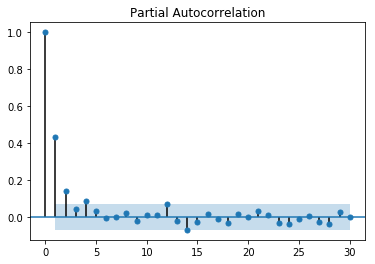

In [89]:
# Verifica propriedade do GARCH:
resid = fitted_am_t6_1.resid
test_cond_het_engle(resid)
_ = smt.graphics.plot_acf(resid, lags=30)
_ = smt.graphics.plot_acf(resid**2, lags=30)
_ = smt.graphics.plot_pacf(resid, lags=30)
_ = smt.graphics.plot_pacf(resid**2, lags=30)


------------------------  TESTE DE LJUNG-BOX  ------------------------
HIPOTESE NULA: Nao ha correlacao serial.
----------------------------------------------------------------------
Min/median/mean/max Ljung-Box test statistic:   0.5916 / 46.9150 / 44.0760 / 70.8918
Min/median/mean/max Ljung-Box p-values:         0.0002 / 0.0008 / 0.0250 / 0.4418
Significant (p<0.1) Ljung-Box test statistic:   [ 4.76806776 17.7734813  17.78962632 18.0069287  18.70532509 18.74430483
 22.029442   26.10136341 30.96564424 34.59750458 40.14349384 40.14381711
 41.64356522 45.32222869 45.749126   46.61605151 46.63127116 47.1986297
 48.18952299 48.25136303 52.43087047 54.35207414 58.44055811 59.87451377
 60.64994687 61.79690963 63.03062576 63.57973143 63.61636898 66.49014482
 67.50110228 69.26300486 69.47858695 69.95320783 70.02373234 70.4432715
 70.89182616]
Significant (<0.1) p-values for Ljung-Box test: [0.09217799 0.00324411 0.00678001 0.01193878 0.01651754 0.02745695
 0.01495531 0.00626824 0.00199391 0.

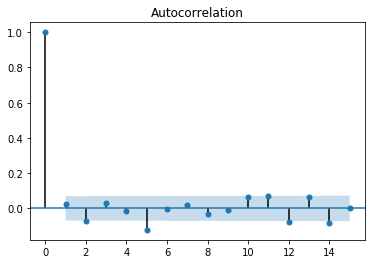

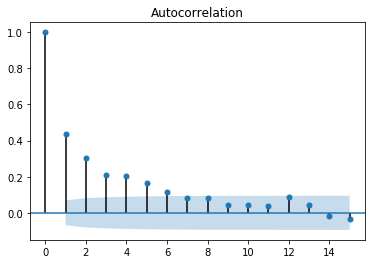

In [90]:
resid = fitted_am_t6_1.resid
test_serialcorr_ljung_box(data=resid)    # o residuo apresenta autocorrelacao? PREMISSA: homocedasticidade
test_normality_jarque_bera(resid)        # o residuo e' normalmente distribuido (1)?
test_normality_shapiro_wilk(resid)       # o residuo e' normalmente distribuido (2)?
test_serialcorr_ljung_box(data=resid**2) # os quadrados dos residuos apresentam autocorrelacao? PREMISSA: homocedastic.
test_cond_het_engle(resid)               # ha heterocedasticidade (ARCH effects) nos residuos?
_ = smt.graphics.plot_acf(resid, lags=15)
_ = smt.graphics.plot_acf(resid**2, lags=15)

#### 6.1.4 Predicao

In [91]:
purge_size = fitted_am_t6_1.num_params

p = q = 1

fitted_am_mdl = fitted_am_t6_1
gmu = fitted_am_mdl.params.iloc[0]
alpha = fitted_am_mdl.params.iloc[1:p+1]
beta = fitted_am_mdl.params.iloc[p+1:p+q+1]

tmp= forecast_return_volatility(df_t6_1_test[purge_size:], gmu=gmu, alpha=alpha, beta=beta)
tmp['y'] = df_t6_1_test[purge_size:]**2
plotscatter(df=tmp, title='Teste 6_1: GARCH(1,1)', columns=['Volatility','y'])

#### 6.1.5 Novos residuos


------------------------  TESTE DE LJUNG-BOX  ------------------------
HIPOTESE NULA: Nao ha correlacao serial.
----------------------------------------------------------------------
Min/median/mean/max Ljung-Box test statistic:   2.3625 / 15.5145 / 19.4285 / 37.7301
Min/median/mean/max Ljung-Box p-values:         0.1243 / 0.5043 / 0.5242 / 0.7893
Significant (p<0.1) Ljung-Box test statistic:   []
Significant (<0.1) p-values for Ljung-Box test: []
----------------------------------------------------------------------


-----------------------  TESTE DE JARQUE-BERA  -----------------------
HIPOTESE NULA:
	 Os dados foram amostrados de uma distribuicao normal
----------------------------------------------------------------------
RESULTADOS:
	 Estatistica do teste: 7.25
	 P-value do teste: 0.0266
	 Assimetria estimada: 0.3156
	 Curtose estimada: 3.6997
----------------------------------------------------------------------


-----------------------  TESTE DE SHAPIRO-WILK  ----------------

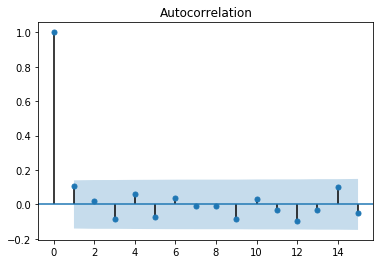

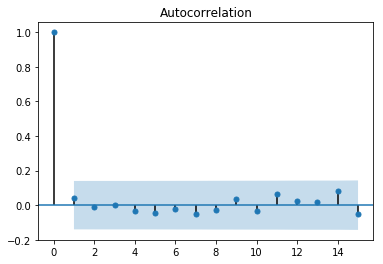

In [92]:
resid = tmp['Std Shocks']
test_serialcorr_ljung_box(data=resid)    # o residuo apresenta autocorrelacao? PREMISSA: homocedasticidade
test_normality_jarque_bera(resid)        # o residuo e' normalmente distribuido (1)?
test_normality_shapiro_wilk(resid)       # o residuo e' normalmente distribuido (2)?
test_serialcorr_ljung_box(data=resid**2) # os quadrados dos residuos apresentam autocorrelacao? PREMISSA: homocedastic.
test_cond_het_engle(resid)               # ha heterocedasticidade (ARCH effects) nos residuos?
_ = smt.graphics.plot_acf(resid, lags=15)
_ = smt.graphics.plot_acf(resid**2, lags=15)

### 6.2 ARMA(1,1) + GARCH(1,1)

#### 6.2.1 Gera dados

In [210]:
# Teste #6.2: ARMA(1,1) + GARCH(1,1)
t6_2 = generate_arima_garch_series(p=1,q=1,m=1,s=1, phi=[0, 0.7],theta=[1, -0.4], alpha=[0.5,0.3],beta=[0.6], seed=621)
r_t6_2, phi_t6_2, theta_t6_2  = t6_2['r'], t6_2['phi'], t6_2['theta']
a_t6_2, alpha_t6_2, beta_t6_2 = t6_2['a'], t6_2['alpha'], t6_2['beta']
df_t6_2 = r2df(r_t6_2)
df_a_t6_2 = r2df(a_t6_2)

# Split treinamento-teste
n_train = int(np.ceil(0.8*len(r_t6_2)))
n_test = len(r_t6_2) - n_train
r_t6_2_train, r_t6_2_test = r_t6_2[:n_train], r_t6_2[n_train:] # 80% treinamento
df_t6_2_train, df_t6_2_test = df_t6_2.iloc[:n_train], df_t6_2.iloc[n_train:]

# Imprime parametros
print('Coeficientes AR (inclui constante):           phi = ' + str(phi_t6_2))
print('Coeficientes MA (inclui coef[0]=1):         theta = ' + str(theta_t6_2))
print('Coeficientes AR (GARCH) (inclui constante): alpha = ' + str(alpha_t6_2))
print('Coeficientes MA (GARCH):                     beta = ' + str(beta_t6_2))

# test_model(df_t6_2)
# test_model(df_a_t6_2)

Coeficientes AR (inclui constante):           phi = [0, 0.7]
Coeficientes MA (inclui coef[0]=1):         theta = [1, -0.4]
Coeficientes AR (GARCH) (inclui constante): alpha = [0.5, 0.3]
Coeficientes MA (GARCH):                     beta = [0.6]


#### 6.2.2 Ajusta modelo

In [211]:
# Modelo ARIMA com p=1, d=0, q=1 (statsmodels.api)
mdl_t6_2 = sm.tsa.SARIMAX(endog=df_t6_2_train, order=(1,0,1), trend='c')
fitted_mdl_t6_2 = mdl_t6_2.fit(solver='lbfgs', maxiter=300)   # ajusta modelo aos dados de treinamento

print(fitted_mdl_t6_2.summary())

                           Statespace Model Results                           
Dep. Variable:                  Value   No. Observations:                  800
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1815.366
Date:                Mon, 28 May 2018   AIC                           3638.731
Time:                        19:41:13   BIC                           3657.470
Sample:                    09-02-2015   HQIC                          3645.930
                         - 11-09-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0028      0.055      0.050      0.960      -0.105       0.111
ar.L1          0.6270      0.049     12.672      0.000       0.530       0.724
ma.L1         -0.3816      0.062     -6.108      0.0

#### 6.2.3 Analise de residuos

In [212]:
tmp_mdl_t6_2 = sm.tsa.ARIMA(endog=df_t6_2_train, order=(1,0,1)) # especificar ordem
fitted_tmp_mdl_t6_2 = tmp_mdl_t6_2.fit(trend='c', method='mle', solver='lbfgs', maxiter=300) # ajusta modelo 
serialcorr_test(results=fitted_tmp_mdl_t6_2)


---------------------  TESTE DE BREUSCH_GODFREY  ---------------------
HIPOTESE NULA: Nao ha correlacao serial.
----------------------------------------------------------------------
Lagrange multiplier test statistic:                 30.127217591873645
P-value for Lagrange multiplier test:               0.06781833763457364
F test statistic (mesmo teste, versao alternativa): 1.5242195230398576
P-value for F test:                                 0.06595504259452027
----------------------------------------------------------------------



/opt/anaconda3/envs/crypto-env/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

/opt/anaconda3/envs/crypto-env/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.

/opt/anaconda3/envs/crypto-env/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.




------------------------  TESTE DE LJUNG-BOX  ------------------------
HIPOTESE NULA: Nao ha correlacao serial.
----------------------------------------------------------------------
Min/median/mean/max Ljung-Box test statistic:   0.0035 / 32.0997 / 28.4163 / 45.6963
Min/median/mean/max Ljung-Box p-values:         0.0119 / 0.1124 / 0.1663 / 0.9527
Significant (p<0.1) Ljung-Box test statistic:   [14.81038297 21.16284482 21.46768471 21.46832506 21.69707789 26.2412792
 26.36311938 26.42689851 26.46395906 27.17398816 29.37373261 30.68425351
 32.07706155 32.12232866 32.19360113 32.2225833  34.04354137]
Significant (<0.1) p-values for Ljung-Box test: [0.06293902 0.01194667 0.01805838 0.02883129 0.04105845 0.01577602
 0.02326644 0.03376793 0.04783959 0.05556497 0.04399852 0.04371062
 0.04248407 0.05690131 0.07415472 0.09560224 0.08389822]
----------------------------------------------------------------------


-----------------------  TESTE DE JARQUE-BERA  -----------------------
HIPOTESE NU

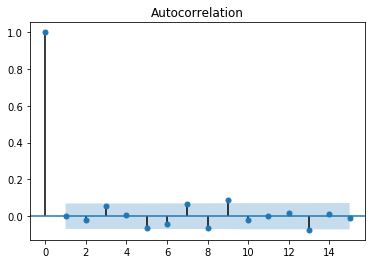

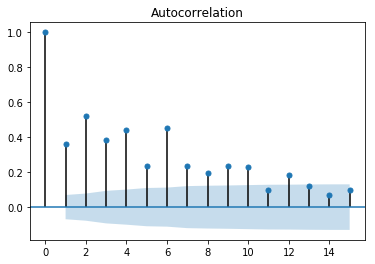

In [213]:
resid = fitted_mdl_t6_2.resid
test_serialcorr_ljung_box(data=resid)    # o residuo apresenta autocorrelacao?
test_normality_jarque_bera(resid)        # o residuo e' normalmente distribuido (1)?
test_normality_shapiro_wilk(resid)       # o residuo e' normalmente distribuido (2)?
test_serialcorr_ljung_box(data=resid**2) # os quadrados dos residuos apresentam autocorrelacao?
test_cond_het_engle(resid)               # ha heterocedasticidade (ARCH effects) nos residuos?
_ = smt.graphics.plot_acf(resid, lags=15)
_ = smt.graphics.plot_acf(resid**2, lags=15)

In [214]:
am_t6_2 = arch.arch_model(y=fitted_mdl_t6_2.resid, mean='Zero', vol='GARCH', p=1, q=1, dist='StudentsT') # mean='Constant'
fitted_am_t6_2 = am_t6_2.fit(disp='off')

print(fitted_am_t6_2.summary())

                          Zero Mean - GARCH Model Results                           
Dep. Variable:                         None   R-squared:                       0.000
Mean Model:                       Zero Mean   Adj. R-squared:                  0.001
Vol Model:                            GARCH   Log-Likelihood:               -1682.27
Distribution:      Standardized Student's t   AIC:                           3372.54
Method:                  Maximum Likelihood   BIC:                           3391.28
                                              No. Observations:                  800
Date:                      Mon, May 28 2018   Df Residuals:                      796
Time:                              19:41:41   Df Model:                            4
                            Volatility Model                            
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0

#### 6.2.4 Predicao e nova analise de residuos

In [215]:
# Predicao in-sample
df_pred_t6_2_train = df_t6_2_train.copy()
df_pred_t6_2_train['Predicted'] = fitted_mdl_t6_2.predict()

# Predicao out-of-sample (purged)
purge_size = max(list(fitted_mdl_t6_2.specification[it] for it in ['k_ar','k_ma']))
test_mdl_t6_2 = sm.tsa.SARIMAX(endog=df_t6_2_test[purge_size:], order=(1,0,1), trend='c')
pred_mdl_t6_2 = test_mdl_t6_2.filter(fitted_mdl_t6_2.params)

df_pred_t6_2_test = df_t6_2_test.iloc[purge_size:].copy()
df_pred_t6_2_test['One-step'] = pred_mdl_t6_2.predict()
df_pred_t6_2_test['Multistep'] = fitted_mdl_t6_2.forecast(steps=len(df_pred_t6_2_test.index))

# Plota
plotscatter(df=df_pred_t6_2_train, title='Teste 6.2: ARIMA(1,0,1)')
plotscatter(df=df_pred_t6_2_test, title='Teste 6.2: ARIMA(1,0,1)')


In [216]:
# Purge size: longest dependency
purge_size = max(fitted_am_t6_2.num_params, max(list(fitted_mdl_t6_2.specification[it] for it in ['k_ar','k_ma'])))

fitted_mdl = fitted_mdl_t6_2
if fitted_mdl.specification['k_ar']>0: phi=fitted_mdl.arparams
else: phi=[]
if fitted_mdl.specification['k_ma']>0: theta=fitted_mdl.maparams 
else: theta=[]
if fitted_mdl.specification['k_trend']>0: mu = fitted_mdl.params.intercept 
else: mu=0
    
p = q = 4
m = s = 1

fitted_am_mdl = fitted_am_t6_2
gmu = fitted_am_mdl.params.iloc[0]
alpha = fitted_am_mdl.params.iloc[1:m+1]
beta = fitted_am_mdl.params.iloc[m+1:m+s+1]

ts = df_t6_2_test[purge_size:] # time series to be tested
tmp= forecast_return_volatility(ts=ts, mu=mu, phi=phi, theta=theta, gmu=gmu, alpha=alpha, beta=beta)
tmp['Actual Return'] = df_t6_2_test[purge_size:]
tmp['Auto-pred. Return'] = df_pred_t6_2_test['One-step'] # predicted by python package
plotscatter(df=tmp.iloc[purge_size:], title='Teste 6_2: ARIMA(1,0,1) + GARCH(1,1) return', 
            columns=['Actual Return', 'Auto-pred. Return', 'Pred. Return'])

tmp['Squared Shocks'] = tmp['Shocks']**2
plotscatter(df=tmp.iloc[purge_size:], title='Teste 6_2: ARIMA(1,0,1) + GARCH(1,1) volatility',
            columns=['Squared Shocks', 'Volatility'], yaxis='Volatility')

plotscatter(df=tmp.iloc[purge_size:], title='Teste 6_2: ARIMA(1,0,1) + GARCH(1,1) std shocks', columns=['Std Shocks'], 
            yaxis='Standard shocks')

In [217]:
ts_pred = tmp['Pred. Return'].replace(0,np.nan).dropna().apply(np.sign)
ts_pred = tmp['Auto-pred. Return'].replace(0,np.nan).dropna().apply(np.sign)
ts_true = tmp['Actual Return'].dropna().apply(np.sign).loc[ts_pred.index]

final_mdl_quality_dict = {'ARMA{} + GARCH{}'.format((1,0,1), (1,1)):
                             classification_metrics(y_true=ts_true.values, y_pred=ts_pred.values)
                         }
final_mdl_quality = pd.DataFrame(data=final_mdl_quality_dict)
final_mdl_quality

ARMA(1, 0, 1) + GARCH(1, 1)
accuracy                             0.683673
cohen_kappa                          0.361026
f1                                   0.718182
fbeta                                0.718182
fn                                  24.000000
fp                                  38.000000
mathews_corrcoef                     0.364844
precision                            0.675214
recall                               0.766990
tn                                  55.000000
tp                                  79.000000

#### 6.2.5 Novos residuos


------------------------  TESTE DE LJUNG-BOX  ------------------------
HIPOTESE NULA: Nao ha correlacao serial.
----------------------------------------------------------------------
Min/median/mean/max Ljung-Box test statistic:   1.7940 / 25.5385 / 21.2354 / 35.9789
Min/median/mean/max Ljung-Box p-values:         0.1804 / 0.3943 / 0.4042 / 0.6579
Significant (p<0.1) Ljung-Box test statistic:   []
Significant (<0.1) p-values for Ljung-Box test: []
----------------------------------------------------------------------


-----------------------  TESTE DE JARQUE-BERA  -----------------------
HIPOTESE NULA:
	 Os dados foram amostrados de uma distribuicao normal
----------------------------------------------------------------------
RESULTADOS:
	 Estatistica do teste: 0.19
	 P-value do teste: 0.9113
	 Assimetria estimada: -0.0132
	 Curtose estimada: 2.8499
----------------------------------------------------------------------


-----------------------  TESTE DE SHAPIRO-WILK  ---------------

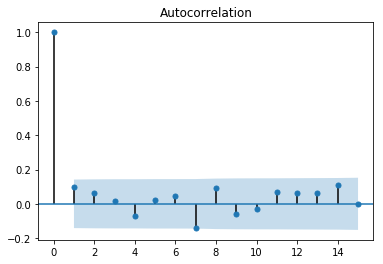

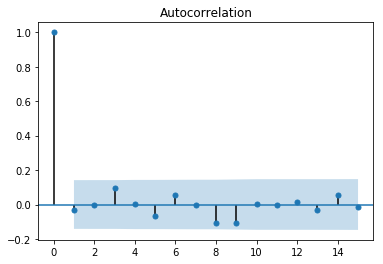

In [218]:
resid = tmp.loc[tmp.index[purge_size]:, 'Std Shocks']
test_serialcorr_ljung_box(data=resid)    # o residuo apresenta autocorrelacao? PREMISSA: homocedasticidade
test_normality_jarque_bera(resid)        # o residuo e' normalmente distribuido (1)?
test_normality_shapiro_wilk(resid)       # o residuo e' normalmente distribuido (2)?
test_serialcorr_ljung_box(data=resid**2) # os quadrados dos residuos apresentam autocorrelacao? PREMISSA: homocedastic.
test_cond_het_engle(resid)               # ha heterocedasticidade (ARCH effects) nos residuos?
_ = smt.graphics.plot_acf(resid, lags=15)
_ = smt.graphics.plot_acf(resid**2, lags=15)

### Obs.: no exogenous variables were used